
### Table of Contents
<ul>
<li><a href="#intro">1. Business issues</a></li>
<li><a href="#data understanding">2. Data understanding </a></li>
<li><a href="#data preparing">3. Data preparation </a></li>
<li><a href="#modeling">4. Modeling </a></li>
<li><a href="#evaluation">5. Evaluation </a></li>
<li><a href="#reference">6. References </a></li>
</ul>

<a id='intro'></a>
## 1. Starbucks Capstone Challenge



### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

## 1.1. Project Goals

Create a ML model to predict if a customer will respond to an offer.

## 1.2. Project Plan

### Step 1

The plan is to build a machine learning model which predicts if an offer to app users will be successful or not. To achieve this, I will observe the portfolio, profile and transaction in a DataFrame. This will allow me to observe various attributes that are present. I will have to clean the datasets if they are dirty or messy.

### Step 2

Thereafter, I will create visualisations to picture various attributes in profile, portfolio, and transcript dataset. This will allow me to determine which variables to keep or remove

### Step 3

Finally, I will create a new dataset for all users who receive offers and observe them and perhaps create the response variable as offer successful or offer unsuccessful. I will handle it as binary classification problem. Depending on whether the data is balanced or unbalanced, we may need the right tools to handle.

### Step 4

We can test our models with follow models in the default setting: We may want to test their accuracies and obtain results from the confusion and classification reports. There we can look at the evaluation metrics such as precision, recall and f1-score. 

Logistic Regression
Random Forest: ensemble bagging classifier
K-Nearest Neighbours: instance-based classifier
Gaussian Naive Bayes: probabilistic classifier
XGBoost: ensemble (extreme!) boosting classifier

We can observe how these models are learning on the training dataset and generalising on the validation datasets. To avoid any uncertainty in performance, we use bootstrap resampling techniques and retrieve aggregate values of evaluation metrics. We may want to look not just at the performance metric but also at the time metrics as well. 
 
One model can be selected based on performance and time metrics and we may perform hyperparameter tuning  by using methods that include grid search and random search

### Step 5

Finally, we can determine how features have contributed to towards the building of our final model. For this we can use SHAP values and create some plots of the variables and finally make recommendation to decision makers which attributes they should pay attention to. 


# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record



### 2.Import Packages

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import math
import json
import pickle
import progressbar
import shap
#import xgboost as xgb
from datetime import datetime, date
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc


In [2]:
from tqdm import trange
from tqdm import tqdm

<a id='data understanding'></a>
### 2. Assess Data 


In [3]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

We will begin with exploring the dataset once by so as to understand structural make-up of the 3 datasets.

#### 2.1. Portfolio Dataset 

Let us explore the Portfolio dataset. It holds data on different offer campaigns used in the Starbucks app.

In [4]:
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
print("portfolio: Rows = {0}, Columns = {1}".format(str(portfolio.shape[0]), str(portfolio.shape[1])))

portfolio: Rows = 10, Columns = 6


In [6]:
# ascertain if there a null values
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

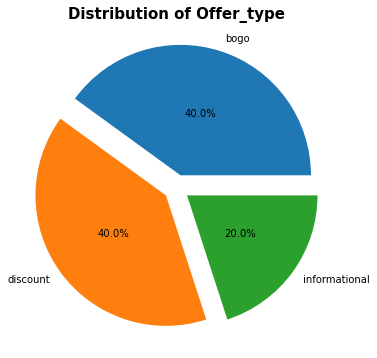

In [7]:
# plot the distribution of the offer types
pie, ax = plt.subplots(figsize=[10,6])
plt.title('Distribution of Offer_type', weight='bold', fontsize=15);
expn = (0.1, 0.1,0.1)
    # Plot
plt.pie(x=portfolio.offer_type.dropna().value_counts(), labels=portfolio.offer_type.value_counts().index, explode=expn,  autopct="%.1f%%", pctdistance=0.5)
plt.show()

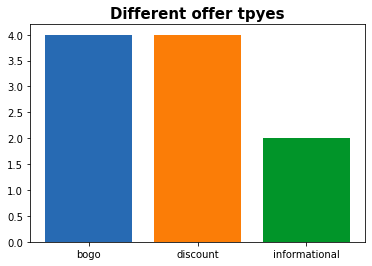

In [8]:
#Display bar graph of different offers
plt.title('Different offer tpyes', weight='bold', fontsize=15);
plt.bar(list(portfolio.offer_type.value_counts().index), portfolio.offer_type.value_counts(),color=['#276ab3','#fb7d07','#019529']);

In [9]:
portfolio.offer_type.value_counts()

bogo             4
discount         4
informational    2
Name: offer_type, dtype: int64

- Dataset has three offer types namely BOGO (Buy One Get One Free), information, discount offers
- There are 10 different offers that consist of 4 BOGO, 4 discounts and 2 informationals
- Channels, offer_type and id columns are categorical variables
- Duration column is measured in days
- Reward as well as difficulty columns are in US Dollars units
- Discount and BOGO variables are 40% each with informational taking 20%
- There are no null values

#### 2.2 Profile Dataset

This dataset holds information on Customers.

In [10]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [11]:
# display null values 
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [12]:
# check for gender and income values that missing
profile[(profile['income'].isnull()) & (profile['gender'].isnull())]

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [13]:
# display unique age values
profile.age.unique()

array([118,  55,  75,  68,  65,  58,  61,  26,  62,  49,  57,  40,  64,
        78,  42,  56,  33,  46,  59,  67,  53,  22,  96,  69,  20,  45,
        54,  39,  41,  79,  66,  29,  44,  63,  36,  76,  77,  30,  51,
        27,  73,  74,  70,  89,  50,  90,  60,  19,  72,  52,  18,  71,
        83,  43,  47,  32,  38,  34,  85,  48,  35,  82,  21,  24,  81,
        25,  37,  23, 100,  28,  84,  80,  87,  86,  94,  31,  88,  95,
        93,  91,  92,  98, 101,  97,  99], dtype=int64)

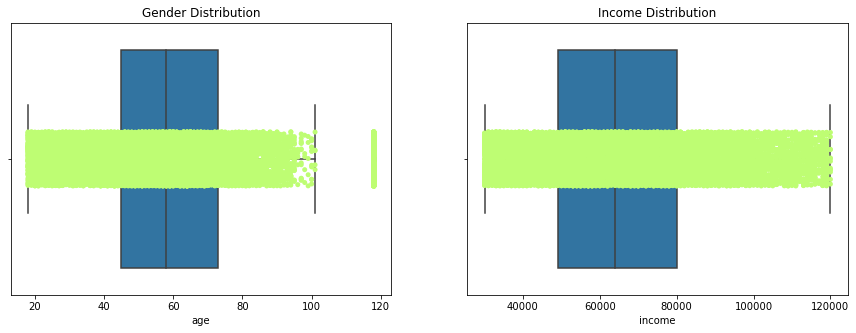

In [14]:
# plot Boxplot and with stripplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax1 = sns.boxplot(ax=axes[0], data=profile, x='age').set(title='Gender Distribution') 
ax2 = sns.boxplot(ax=axes[1], data=profile, x='income').set(title='Income Distribution')
ax1 = sns.stripplot(ax=axes[0], data=profile, x='age', color="#befd73")
ax2 = sns.stripplot(ax=axes[1], data=profile, x='income', color="#befd73")

plt.show()

In [15]:
missing_values=profile[(profile['income'].isnull()) & (profile['gender'].isnull())]['age'].tolist()

In [16]:
# calculate percentage of genders with income of null values
percentage_gender =round((profile.gender.isnull().sum()/profile.shape[0])*100,2)

In [17]:
# percentage of missing data
print('The percentage of missing gender and income values are:',percentage_gender,'%')

The percentage of missing gender and income values are: 12.79 %


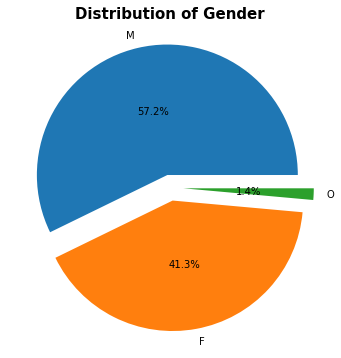

In [18]:
# display percentage distribution of gender tpyes
pie, ax = plt.subplots(figsize=[10,6])
plt.title('Distribution of Gender', weight='bold', fontsize=15);
expn = (0.1, 0.1,0.1)
plt.pie(x=profile.gender.dropna().value_counts(), labels=profile.gender.value_counts().index, explode=expn,  autopct="%.1f%%", pctdistance=0.5)
plt.show()

- Dataset has 57.25% male App_users, 41,3% females and 1.4% from other gender group,
- App_users ages varies form 18 to 118
- There seems to be no App_users between 100 to 118
- Bulk of App_users have ages ranging from 50 to 70 years
- Most App_users have income ranging from 50000 to 80000 dollars
- Extreme values at the age 118 years and can be considered as outliers
- Distribution of income turns to be evenly spread within the interval
- 12.79 percent of the dataset can be considered as missing value and this would dropped later.

#### 2.3.Transcript dataset

In [19]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [20]:
transcript.shape

(306534, 4)

In [21]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [22]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [23]:
transcript_event = transcript['event'].value_counts().reset_index().rename(columns={'index':'event_type'})

In [24]:
transcript_event 

,event_type,event
0,transaction,138953
1,offer received,76277
2,offer viewed,57725
3,offer completed,33579


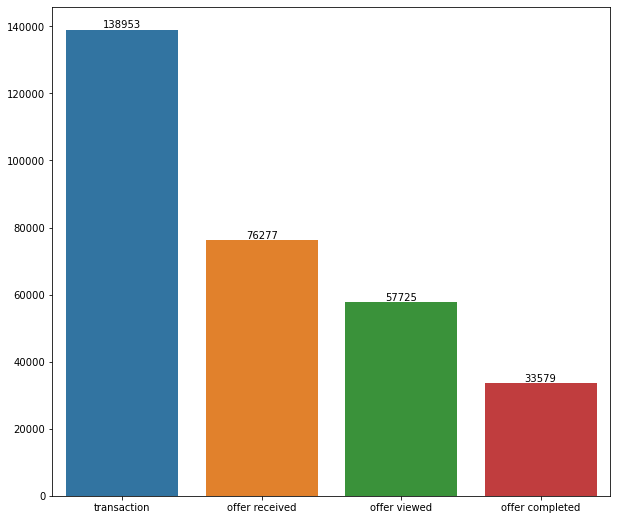

In [25]:
plt.figure(figsize=(10,9))
ax=sns.barplot(y=transcript_event['event'].values,x=transcript_event['event_type'].tolist());
ax.bar_label(ax.containers[0]);

- Many transactions have occured
- Most probably transactions occured without offers sent out to the App_users
- More than half of offers sent out were viewed by the App_users
- A litte over more than half of offers viewed translated into offers completed

Now we are finished with understanding the dataset, we will next clean the dataset so as prepare them for modeling.

<a id='data preparing'></a>
## 3. Data wrangling

Through previous analyis some quality (content issues) as well as structure (tidiness) issues that come alone with the datasets have been identified. We present quite a few here.

- Quality issues concern issues with content. Low quality data is considered as dirty data.
- Tidiness issues are linked with structure of the data that prevent easy analysis. Untidy data is also known as messy data.
- Tidiness of a data requires that each variable forms a column, each observation forms a row and each type of observational unit forms a table. 

#### 3.1 Portfolio Dataset

- There are 10 rows and 6 columns
- Dataset has three offer types namely BOGO (Buy One Get One Free), information, discount offers
- There are 10 different offers that consist of 4 BOGO, 4 discounts and 2 informational
- Channels, offer_type and id columns are categorical variables
- Duration column is measured in days
- Reward as well as difficulty columns are in US Dollars units
- Discount and BOGO variables are 40% each with informational taking 20%
- There are no null values

In [26]:
# copy the dataset for further processing
portfolio_clean = portfolio.copy()

In [27]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [28]:
portfolio_clean 

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


### 3.1.1 Portfolio dataset: Quality issues

There are no quality issues.

#### 3.1.1.1 Portfolio dataset: Tidiness issues.

- Unpack channels to their own columns, get the dummies and drop parent column
- Get dummies for offer_type and drop parent column
- Map each user hash to integer, rename column to app_user and drop the parent column

##### Define

Unpack channels to their own columns and get the dummies

##### Code

In [29]:
# Unpack channels  to strings to prepare for dummies
portfolio_clean['channels'] = portfolio_clean['channels'].str.join(',')
# Use dummies to split at commas
channel_dummies = portfolio_clean['channels'].str.get_dummies(',')

##### Test

In [30]:
# Show dummies
channel_dummies

,email,mobile,social,web
0,1,1,1,0
1,1,1,1,1
2,1,1,0,1
3,1,1,0,1
4,1,0,0,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,0
8,1,1,1,1
9,1,1,0,1


##### Define

Merge channel_dummies to portfolio_clean dataset and drop parent column

##### Code

In [31]:
portfolio_clean =pd.concat([portfolio_clean,channel_dummies], axis=1)

In [32]:
portfolio_clean.drop('channels', axis=1, inplace=True)

##### Test

In [33]:
portfolio_clean

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1


In [34]:
portfolio_clean.rename(columns = {'id':'offer_id'}, inplace = True)

In [35]:
# store copy for future use as offer_id hash map
hash_portfolio = portfolio_clean.copy() 


##### Define

Get dummies for offer_type and drop parent column

##### Code

In [36]:
offer_type_dummies = portfolio_clean['offer_type'].str.get_dummies(',')

##### Test

In [37]:
offer_type_dummies

,bogo,discount,informational
0,1,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,0,1
8,1,0,0
9,0,1,0


##### Define

Merge offer_type_dummies to portfolio_clean dataset and drop parent column

##### Code

In [38]:
portfolio_clean = pd.concat([portfolio_clean,offer_type_dummies], axis=1)

In [39]:
portfolio_clean.drop('offer_type', axis=1, inplace=True)

##### Test

In [40]:
portfolio_clean

,reward,difficulty,duration,offer_id,email,mobile,social,web,bogo,discount,informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,0,1
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,1,0


##### Define

Map each offer hash to integer and drop the parent column

##### Code

In [41]:
def offer_id_mapper():
    coded_dict = dict()
    cter = 1
    offer_id_encoded = []
    
    for val in portfolio_clean['offer_id']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        offer_id_encoded.append(coded_dict[val])
        
    return offer_id_encoded

encoded_offer_id = offer_id_mapper()
del portfolio_clean['offer_id']
portfolio_clean['offer_id'] = encoded_offer_id


##### Test

In [42]:
portfolio_clean

,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational,offer_id
0,10,10,7,1,1,1,0,1,0,0,1
1,10,10,5,1,1,1,1,1,0,0,2
2,0,0,4,1,1,0,1,0,0,1,3
3,5,5,7,1,1,0,1,1,0,0,4
4,5,20,10,1,0,0,1,0,1,0,5
5,3,7,7,1,1,1,1,0,1,0,6
6,2,10,10,1,1,1,1,0,1,0,7
7,0,0,3,1,1,1,0,0,0,1,8
8,5,5,5,1,1,1,1,1,0,0,9
9,2,10,7,1,1,0,1,0,1,0,10


In [43]:
# move offer_id column to the first column
first_column = portfolio_clean.pop('offer_id')
portfolio_clean.insert(0, 'offer_id', first_column)

### 3.2. Profile Dataset

In [44]:
# copy the profile dataset
profile_clean = profile.copy()

In [45]:
#profile dataset
profile_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [46]:
profile_clean

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


- 1700 rows and 5 columns
- No null values for age, id and become_member_on
- Gender and Income columns have null values
- Minimum age is 16 and max age is 118
- Age 118 has no gender und corresponding income data values, constituting 12.7% of the dataset.
- Considered as outlier and hence dropped
- Minimum income is 30000 and maximum is 120000


#### Profile Dataset: Quality Issues¶

- Drop null values from age and income columns (consist of 12.7% of the dataset)
- Convert become_member_on column to datetime object and add year and month columns

#### Profile Dataset: Tidness issues

- Replace gender types in gender column for better readability
- Get dummies of gender column
- Map hash in id column and rename id app_user
- Categorize app_users income in 5 equal group and get dummies

##### Define

Drop null values from age and income columns (consist of 12.7% of the dataset)

##### Code

In [47]:
profile_clean.dropna(subset=['income'], axis=0, inplace=True)

##### Test

In [48]:
profile_clean.isnull().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

##### Define

Convert become_member_on column to datetime object and add year and month columns

##### Code

In [49]:
profile_clean['became_member_on'] = profile_clean['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
# add new columns for month & year
profile_clean['month_member'] = profile_clean['became_member_on'].apply(lambda x: x.day)
profile_clean['year_member'] = profile_clean['became_member_on'].apply(lambda x: x.year)
# drop became_member_on column
profile_clean.drop('became_member_on',axis=1, inplace=True)    

##### Test

In [50]:
profile_clean

,gender,age,id,income,month_member,year_member
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,15,2017
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,9,2017
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,26,2018
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,9,2018
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,11,2017
...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,4,2018
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,13,2018
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,26,2017
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,7,2016


##### Define

- Replace gender types in gender column for better readability

##### Code

In [51]:
profile_clean['gender']= profile_clean['gender'].replace({'F':'Female', 'M':'Male', 'O':'Other'})

##### Test

In [52]:
profile_clean

,gender,age,id,income,month_member,year_member
1,Female,55,0610b486422d4921ae7d2bf64640c50b,112000.0,15,2017
3,Female,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,9,2017
5,Male,68,e2127556f4f64592b11af22de27a7932,70000.0,26,2018
8,Male,65,389bc3fa690240e798340f5a15918d5c,53000.0,9,2018
12,Male,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,11,2017
...,...,...,...,...,...,...
16995,Female,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,4,2018
16996,Male,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,13,2018
16997,Male,49,01d26f638c274aa0b965d24cefe3183f,73000.0,26,2017
16998,Female,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,7,2016


##### Define

- Map hash in id column and rename id app_user

##### Code

In [53]:
def user_id_mapper():
    coded_dict = dict()
    cter = 1
    user_id_encoded = []
    
    for val in profile_clean['id']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        user_id_encoded.append(coded_dict[val])
        
    return user_id_encoded

user_encoded = user_id_mapper()
del profile_clean['id']
profile_clean['app_user'] = user_encoded

##### Test

In [54]:
# show header
profile_clean

,gender,age,income,month_member,year_member,app_user
1,Female,55,112000.0,15,2017,1
3,Female,75,100000.0,9,2017,2
5,Male,68,70000.0,26,2018,3
8,Male,65,53000.0,9,2018,4
12,Male,58,51000.0,11,2017,5
...,...,...,...,...,...,...
16995,Female,45,54000.0,4,2018,14821
16996,Male,61,72000.0,13,2018,14822
16997,Male,49,73000.0,26,2017,14823
16998,Female,83,50000.0,7,2016,14824


##### Define

- Categorize app_users into age groups and get dummies

##### Code

In [55]:
def group_age(df):
    """
    explore profile_clean data and group ages to ranges Parameters
    ----------   
    df: profile dataset
    Returns
    -------
    df: output data frame with age ranges
    """

    df['age'] = df['age'].astype(int)
   
  # filter age ranges, then replace income integer with strings
    df.loc[df['age'].between(18, 24), 'age_group'] = '18-24'
    df.loc[df['age'].between(25, 34), 'age_group'] = '25-34'
    df.loc[df['age'].between(35, 44), 'age_group'] = '35-44'
    df.loc[df['age'].between(45, 54), 'age_group'] = '45-54'
    df.loc[df['age'].between(55, 64), 'age_group'] = '55-64'
    df.loc[df['age'].between(65, 74), 'age_group'] = '65-74'
    df.loc[df['age'].between(75, 84), 'age_group'] = '75-84'
    df.loc[df['age'].between(88, 94), 'age_group'] = '85-94'
    df.loc[df['age'].between(95, 101), 'age_group'] = '95-101'

    return df

##### Test

In [56]:
age_range = group_age(profile_clean)

age_range 

,gender,age,income,month_member,year_member,app_user,age_group
1,Female,55,112000.0,15,2017,1,55-64
3,Female,75,100000.0,9,2017,2,75-84
5,Male,68,70000.0,26,2018,3,65-74
8,Male,65,53000.0,9,2018,4,65-74
12,Male,58,51000.0,11,2017,5,55-64
...,...,...,...,...,...,...,...
16995,Female,45,54000.0,4,2018,14821,45-54
16996,Male,61,72000.0,13,2018,14822,55-64
16997,Male,49,73000.0,26,2017,14823,45-54
16998,Female,83,50000.0,7,2016,14824,75-84


In [57]:
age_dummies = pd.get_dummies(age_range['age_group'], prefix=None)

In [58]:
profile_clean = pd.concat([profile_clean,age_dummies], axis=1)

In [59]:
profile_clean

,gender,age,income,month_member,year_member,app_user,age_group,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85-94,95-101
1,Female,55,112000.0,15,2017,1,55-64,0,0,0,0,1,0,0,0,0
3,Female,75,100000.0,9,2017,2,75-84,0,0,0,0,0,0,1,0,0
5,Male,68,70000.0,26,2018,3,65-74,0,0,0,0,0,1,0,0,0
8,Male,65,53000.0,9,2018,4,65-74,0,0,0,0,0,1,0,0,0
12,Male,58,51000.0,11,2017,5,55-64,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,Female,45,54000.0,4,2018,14821,45-54,0,0,0,1,0,0,0,0,0
16996,Male,61,72000.0,13,2018,14822,55-64,0,0,0,0,1,0,0,0,0
16997,Male,49,73000.0,26,2017,14823,45-54,0,0,0,1,0,0,0,0,0
16998,Female,83,50000.0,7,2016,14824,75-84,0,0,0,0,0,0,1,0,0


##### Define

Split income bands by quantiles for creating 5 equal income groups

##### Code

In [60]:
# split income bands by quantiles for creating 5 equal income groups
bins = []
group_names = ['income_range1', 'income_range2', 'income_range3', 'income_range4', 'income_range5']

for i in range(0, 12, 2):
    
    # create 5 equal income groups using quantiles
    bin_values = profile_clean['income'].quantile(q=[i/10]).values[0]
    bins.append(bin_values)
    
# Create column with groups    
profile_clean['income_group'] = pd.cut(profile_clean['income'], bins, labels=group_names)

##### Test

In [61]:
profile_clean

,gender,age,income,month_member,year_member,app_user,age_group,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85-94,95-101,income_group
1,Female,55,112000.0,15,2017,1,55-64,0,0,0,0,1,0,0,0,0,income_range5
3,Female,75,100000.0,9,2017,2,75-84,0,0,0,0,0,0,1,0,0,income_range5
5,Male,68,70000.0,26,2018,3,65-74,0,0,0,0,0,1,0,0,0,income_range3
8,Male,65,53000.0,9,2018,4,65-74,0,0,0,0,0,1,0,0,0,income_range2
12,Male,58,51000.0,11,2017,5,55-64,0,0,0,0,1,0,0,0,0,income_range2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,Female,45,54000.0,4,2018,14821,45-54,0,0,0,1,0,0,0,0,0,income_range2
16996,Male,61,72000.0,13,2018,14822,55-64,0,0,0,0,1,0,0,0,0,income_range4
16997,Male,49,73000.0,26,2017,14823,45-54,0,0,0,1,0,0,0,0,0,income_range4
16998,Female,83,50000.0,7,2016,14824,75-84,0,0,0,0,0,0,1,0,0,income_range2


In [62]:
income_dummies = pd.get_dummies(profile_clean['income_group'], prefix=None)

In [63]:
profile_clean = pd.concat([profile_clean,income_dummies], axis=1)

In [64]:
profile_clean

,gender,age,income,month_member,year_member,app_user,age_group,18-24,25-34,35-44,...,65-74,75-84,85-94,95-101,income_group,income_range1,income_range2,income_range3,income_range4,income_range5
1,Female,55,112000.0,15,2017,1,55-64,0,0,0,...,0,0,0,0,income_range5,0,0,0,0,1
3,Female,75,100000.0,9,2017,2,75-84,0,0,0,...,0,1,0,0,income_range5,0,0,0,0,1
5,Male,68,70000.0,26,2018,3,65-74,0,0,0,...,1,0,0,0,income_range3,0,0,1,0,0
8,Male,65,53000.0,9,2018,4,65-74,0,0,0,...,1,0,0,0,income_range2,0,1,0,0,0
12,Male,58,51000.0,11,2017,5,55-64,0,0,0,...,0,0,0,0,income_range2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,Female,45,54000.0,4,2018,14821,45-54,0,0,0,...,0,0,0,0,income_range2,0,1,0,0,0
16996,Male,61,72000.0,13,2018,14822,55-64,0,0,0,...,0,0,0,0,income_range4,0,0,0,1,0
16997,Male,49,73000.0,26,2017,14823,45-54,0,0,0,...,0,0,0,0,income_range4,0,0,0,1,0
16998,Female,83,50000.0,7,2016,14824,75-84,0,0,0,...,0,1,0,0,income_range2,0,1,0,0,0


In [65]:
# move offer_id column to the first column
first_column = profile_clean.pop('app_user')
profile_clean.insert(0, 'app_user', first_column)

In [66]:
# get gender dummies
gender_dummies = pd.get_dummies(profile_clean['gender'], prefix=None)

In [67]:
# insert the gender dummies
profile_clean = pd.concat([profile_clean,gender_dummies], axis=1)

In [68]:
# drop income_group column
profile_clean.drop('income_group', axis=1, inplace=True)

In [69]:
#get year dummies
year_dummies = pd.get_dummies(profile_clean['year_member'], prefix=None)

In [70]:
# insert the year dummies
profile_clean = pd.concat([profile_clean, year_dummies], axis=1)

In [71]:
profile_clean

,app_user,gender,age,income,month_member,year_member,age_group,18-24,25-34,35-44,...,income_range5,Female,Male,Other,2013,2014,2015,2016,2017,2018
1,1,Female,55,112000.0,15,2017,55-64,0,0,0,...,1,1,0,0,0,0,0,0,1,0
3,2,Female,75,100000.0,9,2017,75-84,0,0,0,...,1,1,0,0,0,0,0,0,1,0
5,3,Male,68,70000.0,26,2018,65-74,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8,4,Male,65,53000.0,9,2018,65-74,0,0,0,...,0,0,1,0,0,0,0,0,0,1
12,5,Male,58,51000.0,11,2017,55-64,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,14821,Female,45,54000.0,4,2018,45-54,0,0,0,...,0,1,0,0,0,0,0,0,0,1
16996,14822,Male,61,72000.0,13,2018,55-64,0,0,0,...,0,0,1,0,0,0,0,0,0,1
16997,14823,Male,49,73000.0,26,2017,45-54,0,0,0,...,0,0,1,0,0,0,0,0,1,0
16998,14824,Female,83,50000.0,7,2016,75-84,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [72]:
# Formatting data for grouped bar plot
age_ranges = profile_clean.groupby(['age_group', 'gender'])['age'].count().reset_index().rename(columns={'age':'count'})
age_ranges['gender'] = age_ranges['gender']



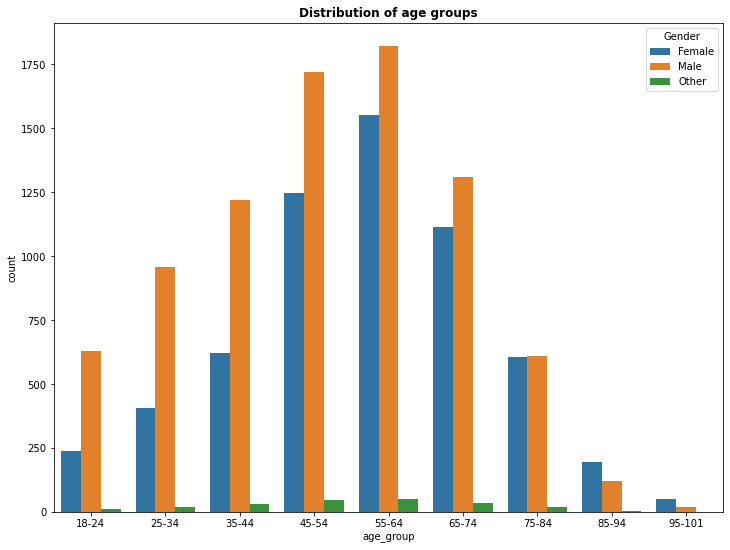

In [73]:
# Plot
plt.figure(figsize=(12,9))
sns.barplot(x='age_group', y='count', hue='gender', data=age_ranges).legend(title='Gender')
# Plot
plt.title('Distribution of age groups', weight='bold');


### 3.3 Transcript Dataset

In [74]:
transcript_clean = transcript.copy()

In [75]:
transcript_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [76]:
transcript_clean

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


#### 3.3.1 Transcript Dataset: Quality Issues

#### Transcript Dataset: Tidiness Issues

- Map each hash of person column and rename it app_user
- Split event column to their own columns and get the dummies
- Expand value (dictionary column) to their own colunms and get their dummies
- Construct offer_data and transaction data
- Rename person column to app_user and map each hash to integer
- Get dummies for event column


##### Define

- map each hash of person column and rename it app_user

##### Code

In [77]:
def user_id_mapper():
    coded_dict = dict()
    cter = 1
    user_id_encoded = []
    
    for val in transcript_clean['person']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        user_id_encoded.append(coded_dict[val])
        
    return user_id_encoded

app_user_encoded = user_id_mapper()
del transcript_clean['person']
transcript_clean['app_user'] = app_user_encoded


##### Test

In [78]:
transcript_clean

,event,value,time,app_user
0,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1
1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,2
2,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,3
3,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,4
4,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,5
...,...,...,...,...
306529,transaction,{'amount': 1.5899999999999999},714,12620
306530,transaction,{'amount': 9.53},714,12624
306531,transaction,{'amount': 3.61},714,13099
306532,transaction,{'amount': 3.5300000000000002},714,12640


##### Define

- Unpack value column to their own column

##### Code

In [79]:
def cleaning_transcript(df):
    """
    Cleaning the transcript data.
    
    Parameters
    ----------   
    df: transcript dataset
    Returns
    -------
    df: output data frame 
    
    New column names given for expanded keys
    -------
    reward_gained : money gained from "offer completed"
    amount_spent : money spent in "transaction"
    offer_id 
    """
    # expand the dictionary to columns 
    df['offer_id'] = df['value'].apply(lambda x: x.get('offer_id'))
    df['offer id'] = df['value'].apply(lambda x: x.get('offer id'))
    df['reward_gained'] = df['value'].apply(lambda x: x.get('reward'))
    df['amount_spent'] = df['value'].apply(lambda x: x.get('amount'))
    
    # move 'offer id' values into 'offer_id'
    df['offer_id'] = df.apply(lambda x : x['offer id'] if x['offer_id'] == None else x['offer_id'], axis=1)
    # drop 'offer id' column 
    df.drop(['offer id' , 'value'] , axis=1, inplace=True)
    # replace nan
    df.fillna(0 , inplace=True)
    
    return df

##### Test

In [80]:
transcript_clean = cleaning_transcript(transcript_clean)

In [81]:
transcript_clean

,event,time,app_user,offer_id,reward_gained,amount_spent
0,offer received,0,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0.00
1,offer received,0,2,0b1e1539f2cc45b7b9fa7c272da2e1d7,0.0,0.00
2,offer received,0,3,2906b810c7d4411798c6938adc9daaa5,0.0,0.00
3,offer received,0,4,fafdcd668e3743c1bb461111dcafc2a4,0.0,0.00
4,offer received,0,5,4d5c57ea9a6940dd891ad53e9dbe8da0,0.0,0.00
...,...,...,...,...,...,...
306529,transaction,714,12620,0,0.0,1.59
306530,transaction,714,12624,0,0.0,9.53
306531,transaction,714,13099,0,0.0,3.61
306532,transaction,714,12640,0,0.0,3.53


In [82]:
transcript_clean.offer_id.unique().tolist()

['9b98b8c7a33c4b65b9aebfe6a799e6d9',
 '0b1e1539f2cc45b7b9fa7c272da2e1d7',
 '2906b810c7d4411798c6938adc9daaa5',
 'fafdcd668e3743c1bb461111dcafc2a4',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 'f19421c1d4aa40978ebb69ca19b0e20d',
 '2298d6c36e964ae4a3e7e9706d1fb8c2',
 '3f207df678b143eea3cee63160fa8bed',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 '5a8bc65990b245e5a138643cd4eb9837',
 0]

##### Define

- replace hash in offer_id with integers and map

##### Code

In [83]:
def map_hash_offer(df_1, col_1, df_2, col_2):
    '''This function replaces hashes with integers.
    
    INPUT:
    df - dataframe 'variable'
    col - column in dataframe containing the hashes 'string'
    var - variable for column
    
    
    OUTPUT:
    none.
    '''
    # Input 1
    x_id = df_1[col_1].unique()
    x_dict = pd.Series(x_id).to_dict()
    x_dict = dict([(value, key) for key, value in x_dict.items()])
    x_dict = dict([(key, value +1) for key, value in x_dict.items()])
    
    # Input 2
    y_id = df_2[col_2].unique()
    y_dict = pd.Series(y_id).to_dict()
    y_dict = dict([(value, key) for key, value in y_dict.items()])
    y_dict = dict([(key, value +1) for key, value in y_dict.items()])
    df_1[col_1] = df_1[col_1].map(y_dict)



In [84]:
# map hash values offer_ids into integers
map_hash_offer(transcript_clean, 'offer_id', hash_portfolio, 'offer_id')


In [85]:
# filter app_user in (customer) profile_clean
app_user_count = transcript_clean['app_user'].count()
transcript_clean = transcript_clean[transcript_clean['app_user'].isin(profile_clean['app_user'])]

In [86]:
transcript_clean

,event,time,app_user,offer_id,reward_gained,amount_spent
0,offer received,0,1,4.0,0.0,0.00
1,offer received,0,2,5.0,0.0,0.00
2,offer received,0,3,10.0,0.0,0.00
3,offer received,0,4,7.0,0.0,0.00
4,offer received,0,5,2.0,0.0,0.00
...,...,...,...,...,...,...
306529,transaction,714,12620,NaN,0.0,1.59
306530,transaction,714,12624,NaN,0.0,9.53
306531,transaction,714,13099,NaN,0.0,3.61
306532,transaction,714,12640,NaN,0.0,3.53


In [87]:
#Print user counts before and after operation
print('app_user count before:', app_user_count)
print('app_user count after:', transcript_clean['app_user'].count())


app_user count before: 306534
app_user count after: 275506


### 4 Create offer_data and transaction data

##### Define

Create offer data and transaction data

##### code

In [88]:
# Create transaction data
transaction_data = transcript_clean[transcript_clean['offer_id'].isna()]
transaction_data = transaction_data[['app_user', 'time', 'amount_spent']]

In [89]:
#create offer data
offer_data = transcript_clean.loc[transcript_clean['event']!='transaction']

##### Test

In [90]:
transaction_data

,app_user,time,amount_spent
12654,28,0,0.83
12657,37,0,34.56
12659,12651,0,13.23
12670,6658,0,19.51
12671,108,0,18.97
...,...,...,...
306529,12620,714,1.59
306530,12624,714,9.53
306531,13099,714,3.61
306532,12640,714,3.53


In [91]:
offer_data

,event,time,app_user,offer_id,reward_gained,amount_spent
0,offer received,0,1,4.0,0.0,0.0
1,offer received,0,2,5.0,0.0,0.0
2,offer received,0,3,10.0,0.0,0.0
3,offer received,0,4,7.0,0.0,0.0
4,offer received,0,5,2.0,0.0,0.0
...,...,...,...,...,...,...
306490,offer viewed,714,12315,3.0,0.0,0.0
306506,offer completed,714,12467,7.0,2.0,0.0
306507,offer viewed,714,12468,5.0,0.0,0.0
306509,offer completed,714,12470,7.0,2.0,0.0


In [92]:
# get event dummies form the offer_data 
event_dummies = pd.get_dummies(offer_data['event'], prefix=None)
offer_data = pd.concat([offer_data,event_dummies], axis=1)

In [93]:
# rename columns of the event_dummies 
offer_data.rename(columns = {'offer completed':'offer_completed', 'offer received':'offer_received','offer viewed':'offer_viewed'}, inplace = True)

In [94]:
# drop the parent column
offer_data.drop(offer_data.columns[0],axis=1, inplace=True)

In [95]:
offer_data

,time,app_user,offer_id,reward_gained,amount_spent,offer_completed,offer_received,offer_viewed
0,0,1,4.0,0.0,0.0,0,1,0
1,0,2,5.0,0.0,0.0,0,1,0
2,0,3,10.0,0.0,0.0,0,1,0
3,0,4,7.0,0.0,0.0,0,1,0
4,0,5,2.0,0.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...
306490,714,12315,3.0,0.0,0.0,0,0,1
306506,714,12467,7.0,2.0,0.0,1,0,0
306507,714,12468,5.0,0.0,0.0,0,0,1
306509,714,12470,7.0,2.0,0.0,1,0,0


### Data Visualisation 

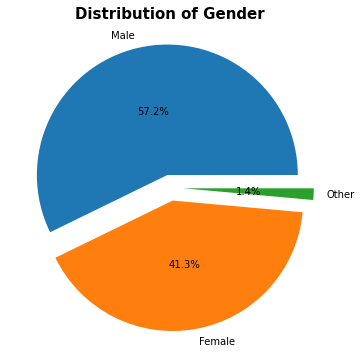

In [96]:
# display percentage distribution of gender tpyes
pie, ax = plt.subplots(figsize=[10,6])
plt.title('Distribution of Gender', weight='bold', fontsize=15);
expn = (0.1, 0.1,0.1)
plt.pie(x=profile_clean.gender.dropna().value_counts(), labels=profile_clean.gender.value_counts().index, explode=expn,  autopct="%.1f%%", pctdistance=0.5)
plt.show()

In [97]:
# display content of the transcript 
transcript_event = transcript_clean['event'].value_counts().reset_index().rename(columns={'index':'event_type'})

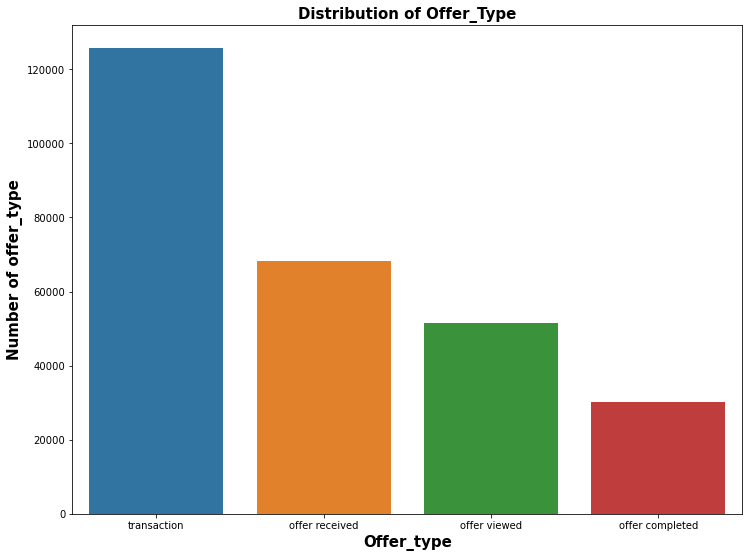

In [98]:
plt.figure(figsize=(12,9))
sns.barplot(y=transcript_event['event'].values,x=transcript_event['event_type'].tolist());
plt.ylabel('Number of offer_type', weight="bold", fontsize=15)
plt.xlabel('Offer_type',weight="bold", fontsize=15)
plt.title('Distribution of Offer_Type', weight='bold', fontsize=15);

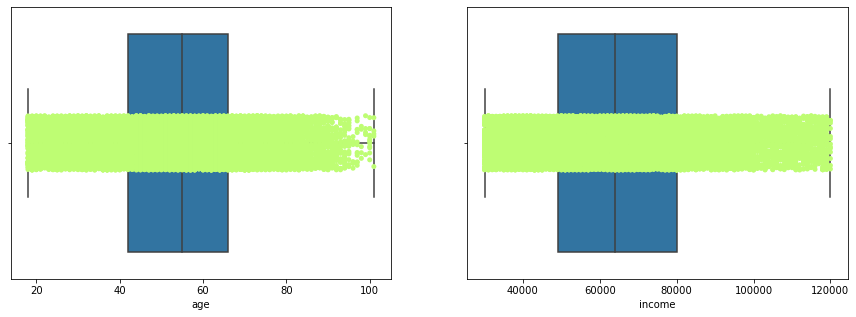

In [99]:
# plot Boxplot and with stripplot
fig, axes = plt.subplots(1, 2, figsize=(15,5))
ax1 = sns.boxplot(ax=axes[0], data=profile_clean, x='age')
ax2 = sns.boxplot(ax=axes[1], data=profile_clean, x='income')
ax1 = sns.stripplot(ax=axes[0], data=profile_clean, x='age', color="#befd73")
ax2 = sns.stripplot(ax=axes[1], data=profile_clean, x='income', color="#befd73")
plt.show()

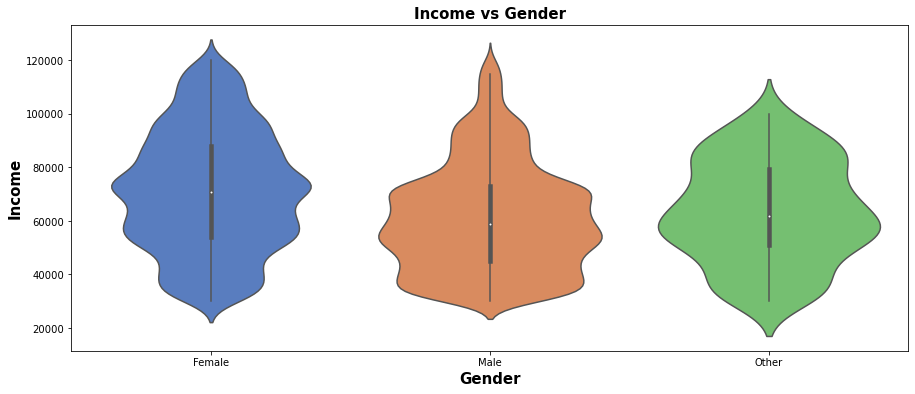

In [100]:
plt.figure(figsize=(15, 6))
sns.violinplot(x=profile_clean[profile_clean['gender'] != 'NA']['gender'], y=profile_clean['income'].dropna(),palette="muted", showmedians=True)
plt.title('Income vs Gender', weight='bold', fontsize=15)
plt.ylabel('Income', weight="bold", fontsize=15)
plt.xlabel('Gender',weight="bold", fontsize=15)
plt.xticks(rotation = 0)
plt.show();

- Minimum and maximum income values of female and males seem to be equal
- Distribution of male income is much spread at lower income levels as compared to female users.
- Median income of males and other groups stands around 6000 dollars and that of females is much higher

In [101]:
df_group=profile_clean.groupby(['year_member','gender']).count().reset_index().rename(columns={'age_group':'count'})

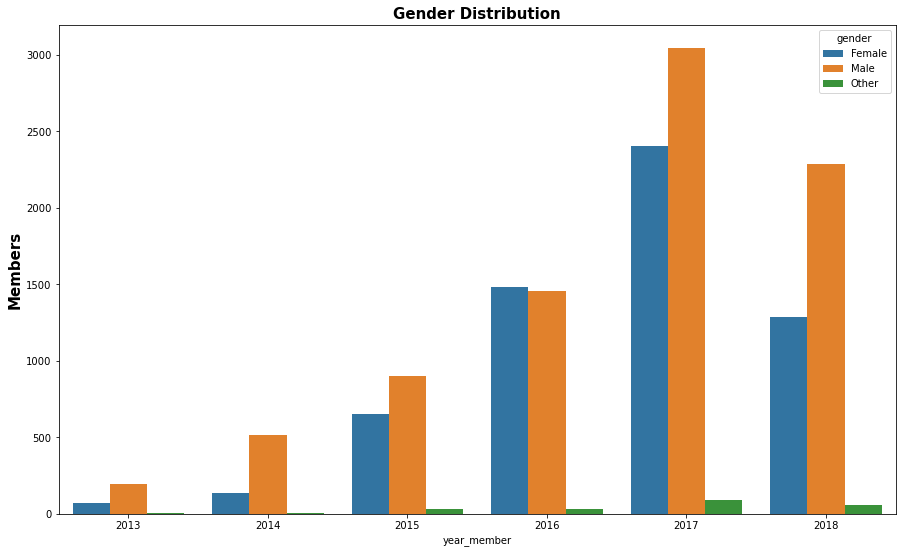

In [102]:
plt.figure(figsize=(15,9))
sns.barplot(x='year_member', y='count', hue='gender', data=df_group)
plt.title('Gender Distribution', weight='bold', fontsize=15)#.legend(title='Gender')
plt.ylabel('Members', weight="bold", fontsize=15);

- Membership of all gender types has been increasing yearly since 2013 to 2017.
- Highest membership pick for all gender type was reached in 2017
- Male population dominate

In [103]:
income_group_df=profile_clean.groupby(['year_member','gender'])['income'].sum().reset_index().rename(columns={'income':'sum_income'})

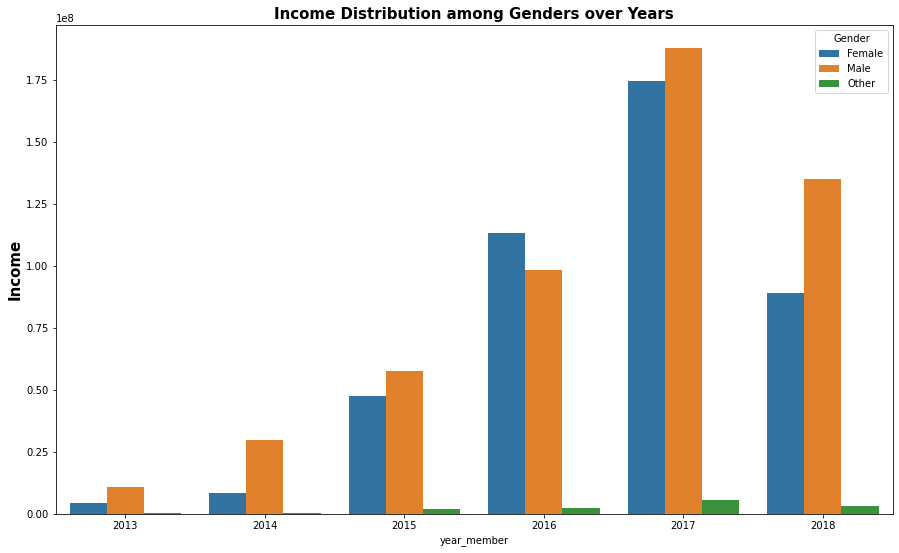

In [104]:
plt.figure(figsize=(15,9))
sns.barplot(x='year_member', y='sum_income', hue='gender', data=income_group_df).legend(title='Gender')
#.set_title('Distribution of total amount', weight='bold', fontsize=20);
plt.ylabel('Income', weight="bold", fontsize=15)
plt.title('Income Distribution among Genders over Years', weight='bold', fontsize=15);

- Most contribution to income came from the male population
- Trend increasing from 2013 for all gender type over the years till 2017
- 2016 did see females' contribution overtake that of male customers
- Contribution to income fell in 2018 though

### Merging all Dataset

In [105]:
def construct_offer_df(portfolio, profile, offer_data, transaction_data):
    ''' This function creates a DataFrame from:
    
    INPUT:
    portfolio - containing offer ids and meta data about each offer (duration, type, etc.)
    profile - demographic data for each customer
    transaction - records for transactions completed
    offer_data - records offers received, offers viewed, and offers completed

    OUTPUT:
    clean_data - Combined DataFrame showing the success of each offer'''
    
    # Init empty array
    clean_data = []
    
    # List each user id
    app_user_list = offer_data['app_user'].unique()
    #cnter = 0
    n_app_users = len(app_user_list)
    
    for idx in trange(len(app_user_list)):
        
        clean_data.extend(combine_data(app_user_list[idx],
                                        portfolio_clean,
                                        profile_clean,
                                        offer_data,
                                        transaction_data))    
    
    # Create dataframe
    clean_data = pd.DataFrame(clean_data).sort_values('time')
    #bar.finish()
    return clean_data.reset_index(drop=True)


In [106]:
def combine_data(user_id, portfolio, profile, offer_data, transaction_data):
    ''' The function creates a list of dictionaries describing success of offers
    sent  
    
    
    INPUT:
    app_user - customer user id (integer)
    portfolio - holds offer ids and meta data about each offer (duration, type, etc.)
    profile - holds demographic data for each customer
    transaction - contain transactions completed
    offer_data - records offers viewed, offers viewed, and offers completed
    
    OUTPUT:
    rows - a list of dictionaries describing success of offers sent to each 
    app_user '''

    get_user = profile[profile['app_user'] == user_id]# Filter a specific user
    get_offer_data = offer_data['app_user'] == user_id # Filter offer data for a specific user
    user_offer_data = offer_data[offer_data['app_user'] ==  user_id]
    #user_offer_data = offer_data[get_offer_data]
    user_offer_data = user_offer_data.drop(columns='app_user').reset_index(drop=True)
        
    #get_transaction = transaction_data['app_user'] == user_id # Filter transaction data for a specific user
    user_transaction_data = transaction_data.loc[transaction_data['app_user'] == user_id]
    user_transaction_data = user_transaction_data.drop(columns='app_user').reset_index(drop=True)
    
    
    # Create DataFrames for when a customer receives, views, and completes an offer
    event_cols = ['offer_received', 'offer_viewed', 'offer_completed']
    
    # Offer received
    offer_received = user_offer_data.loc[user_offer_data['offer_received'] == 1]
    offer_received = offer_received.drop(columns=event_cols).reset_index(drop=True)
    
    # Offer viewed
    offer_viewed = user_offer_data.loc[user_offer_data['offer_viewed'] == 1]
    offer_viewed = offer_viewed.drop(columns=event_cols).reset_index(drop=True)
    
    # Offer completed
    offer_completed = user_offer_data.loc[user_offer_data['offer_completed'] == 1]
    offer_completed = offer_completed.drop(columns=event_cols).reset_index(drop=True)
    
    # Iterate over each offer a customer receives
    rows = []
    for idx in range(offer_received.shape[0]):
        # Get current offer id
        get_offer_id = offer_received.iloc[idx]['offer_id']
        # Filter portfolio data for current offer
        get_offer = portfolio.loc[portfolio['offer_id'] == get_offer_id]
        duration = get_offer['duration'].values[0]
        # Init time the offer is valid
        get_offer_startime = offer_received.iloc[idx]['time']
        get_offer_endtime = offer_received.iloc[idx]['time'] + duration
        # Init boolean array to get transactions within the valid offer time window
        get_offer_viewed = np.logical_and(offer_viewed['time'] >= get_offer_startime,
                                          offer_viewed['time'] <= get_offer_endtime)
        get_transaction = np.logical_and(user_transaction_data['time'] >=get_offer_startime,
                                         user_transaction_data['time'] <=get_offer_endtime)
        
         # Init boolean array to find when user completes an offer
        get_offer_completed = np.logical_and(offer_completed['time'] >= get_offer_startime,
                                             offer_completed['time'] <= get_offer_endtime)
        # Find out if current offer was successful
        get_offer_successful = get_offer_completed.sum() > 0 and get_offer_viewed.sum() > 0
        
        # Get customer transactions occuring within the valid offer time window
        get_offer_transactions = user_transaction_data[get_transaction]
        
        # Init dictionary to construct current app_user offer
        user_row = {'app_user':user_id,
                    'offer_id': get_offer_id,
                    'time': get_offer_startime,
                    'offer_successful': int(get_offer_successful),
                    'total_amount': get_offer_transactions['amount_spent'].sum()}
        
        # Create dict from 'user_row'
        user_row.update(get_user.iloc[0,1:].to_dict())
        user_row.update(get_offer.iloc[0,1:].to_dict())
        # Append 'user_row' to 'rows' list
        rows.append(user_row)
        
    return rows

In [107]:
clean_data=construct_offer_df(portfolio_clean, profile_clean, offer_data,transaction_data)

100%|████████████████████████████████████████████████████████████████████████████| 14823/14823 [04:42<00:00, 52.47it/s]


In [108]:
clean_data_completed = clean_data

In [109]:
# move offer_id column to the first column
first_column = clean_data_completed.pop('offer_successful')
clean_data_completed.insert(0, 'offer_successful', first_column)

In [110]:
clean_data_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68115 entries, 0 to 68114
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   offer_successful  68115 non-null  int64  
 1   app_user          68115 non-null  int64  
 2   offer_id          68115 non-null  float64
 3   time              68115 non-null  float64
 4   total_amount      68115 non-null  float64
 5   gender            68115 non-null  object 
 6   age               68115 non-null  int64  
 7   income            68115 non-null  float64
 8   month_member      68115 non-null  int64  
 9   year_member       68115 non-null  int64  
 10  age_group         67258 non-null  object 
 11  18-24             68115 non-null  int64  
 12  25-34             68115 non-null  int64  
 13  35-44             68115 non-null  int64  
 14  45-54             68115 non-null  int64  
 15  55-64             68115 non-null  int64  
 16  65-74             68115 non-null  int64 

In [111]:
clean_data_completed

,offer_successful,app_user,offer_id,time,total_amount,gender,age,income,month_member,year_member,...,reward,difficulty,duration,email,mobile,social,web,bogo,discount,informational
0,0,1,4.0,0.0,0.00,Female,55,112000.0,15,2017,...,5,5,7,1,1,0,1,1,0,0
1,0,8041,8.0,0.0,0.00,Female,51,62000.0,19,2014,...,0,0,3,1,1,1,0,0,0,1
2,0,8040,8.0,0.0,0.00,Male,48,66000.0,21,2018,...,0,0,3,1,1,1,0,0,0,1
3,0,2593,5.0,0.0,0.00,Female,62,50000.0,29,2018,...,5,20,10,1,0,0,1,0,1,0
4,0,8039,8.0,0.0,0.00,Male,53,94000.0,31,2018,...,0,0,3,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68110,0,9730,8.0,576.0,0.00,Male,78,79000.0,30,2018,...,0,0,3,1,1,1,0,0,0,1
68111,0,9729,8.0,576.0,0.00,Male,38,44000.0,13,2017,...,0,0,3,1,1,1,0,0,0,1
68112,0,1796,7.0,576.0,0.00,Male,59,93000.0,3,2015,...,2,10,10,1,1,1,1,0,1,0
68113,0,9734,3.0,576.0,0.00,Female,63,77000.0,16,2017,...,0,0,4,1,1,0,1,0,0,1


In [112]:
# move offer_id column to the first column
first_column = clean_data.pop('offer_successful')
clean_data.insert(0, 'offer_successful', first_column)

### Distribution of app_user with Sucessful offers

In [113]:
completed_group_df=clean_data_completed.groupby(['year_member','gender'])['total_amount'].sum().reset_index().rename(columns={'total_amount':'sum_income'})

In [114]:
completed_group_df

,year_member,gender,sum_income
0,2013,Female,791.23
1,2013,Male,1350.91
2,2013,Other,83.97
3,2014,Female,1141.61
4,2014,Male,3471.37
5,2014,Other,44.18
6,2015,Female,4111.49
7,2015,Male,5480.83
8,2015,Other,205.41
9,2016,Female,11173.39


In [115]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68115 entries, 0 to 68114
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   offer_successful  68115 non-null  int64  
 1   app_user          68115 non-null  int64  
 2   offer_id          68115 non-null  float64
 3   time              68115 non-null  float64
 4   total_amount      68115 non-null  float64
 5   gender            68115 non-null  object 
 6   age               68115 non-null  int64  
 7   income            68115 non-null  float64
 8   month_member      68115 non-null  int64  
 9   year_member       68115 non-null  int64  
 10  age_group         67258 non-null  object 
 11  18-24             68115 non-null  int64  
 12  25-34             68115 non-null  int64  
 13  35-44             68115 non-null  int64  
 14  45-54             68115 non-null  int64  
 15  55-64             68115 non-null  int64  
 16  65-74             68115 non-null  int64 

In [116]:
 clean_data.drop(['app_user', 'informational','month_member','age_group','age','gender'], axis=1, inplace=True)

In [117]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68115 entries, 0 to 68114
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   offer_successful  68115 non-null  int64  
 1   offer_id          68115 non-null  float64
 2   time              68115 non-null  float64
 3   total_amount      68115 non-null  float64
 4   income            68115 non-null  float64
 5   year_member       68115 non-null  int64  
 6   18-24             68115 non-null  int64  
 7   25-34             68115 non-null  int64  
 8   35-44             68115 non-null  int64  
 9   45-54             68115 non-null  int64  
 10  55-64             68115 non-null  int64  
 11  65-74             68115 non-null  int64  
 12  75-84             68115 non-null  int64  
 13  85-94             68115 non-null  int64  
 14  95-101            68115 non-null  int64  
 15  income_range1     68115 non-null  int64  
 16  income_range2     68115 non-null  int64 

In [118]:
offer_completed = clean_data.loc[clean_data['offer_successful']==1]

In [119]:
offer_completed

,offer_successful,offer_id,time,total_amount,income,year_member,18-24,25-34,35-44,45-54,...,2018,reward,difficulty,duration,email,mobile,social,web,bogo,discount
9,1,10.0,0.0,14.60,59000.0,2015,0,0,0,0,...,0,2,10,7,1,1,0,1,0,1
272,1,4.0,0.0,15.32,95000.0,2017,0,0,0,0,...,0,5,5,7,1,1,0,1,1,0
412,1,4.0,0.0,20.50,115000.0,2017,0,0,0,0,...,0,5,5,7,1,1,0,1,1,0
439,1,1.0,0.0,22.76,56000.0,2018,0,0,1,0,...,1,10,10,7,1,1,1,0,1,0
630,1,2.0,0.0,10.60,80000.0,2016,0,0,0,0,...,0,10,10,5,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67888,1,8.0,576.0,22.18,63000.0,2016,0,0,1,0,...,0,0,0,3,1,1,1,0,0,0
67955,1,4.0,576.0,21.48,102000.0,2015,0,0,0,0,...,0,5,5,7,1,1,0,1,1,0
67966,1,9.0,576.0,32.68,53000.0,2015,0,1,0,0,...,0,5,5,5,1,1,1,1,1,0
67987,1,2.0,576.0,23.33,57000.0,2015,1,0,0,0,...,0,10,10,5,1,1,1,1,1,0


In [120]:
clean_data.offer_id=clean_data.offer_id.astype('float64')

In [121]:
clean_data

,offer_successful,offer_id,time,total_amount,income,year_member,18-24,25-34,35-44,45-54,...,2018,reward,difficulty,duration,email,mobile,social,web,bogo,discount
0,0,4.0,0.0,0.00,112000.0,2017,0,0,0,0,...,0,5,5,7,1,1,0,1,1,0
1,0,8.0,0.0,0.00,62000.0,2014,0,0,0,1,...,0,0,0,3,1,1,1,0,0,0
2,0,8.0,0.0,0.00,66000.0,2018,0,0,0,1,...,1,0,0,3,1,1,1,0,0,0
3,0,5.0,0.0,0.00,50000.0,2018,0,0,0,0,...,1,5,20,10,1,0,0,1,0,1
4,0,8.0,0.0,0.00,94000.0,2018,0,0,0,1,...,1,0,0,3,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68110,0,8.0,576.0,0.00,79000.0,2018,0,0,0,0,...,1,0,0,3,1,1,1,0,0,0
68111,0,8.0,576.0,0.00,44000.0,2017,0,0,1,0,...,0,0,0,3,1,1,1,0,0,0
68112,0,7.0,576.0,0.00,93000.0,2015,0,0,0,0,...,0,2,10,10,1,1,1,1,0,1
68113,0,3.0,576.0,0.00,77000.0,2017,0,0,0,0,...,0,0,0,4,1,1,0,1,0,0


### Relation between variables

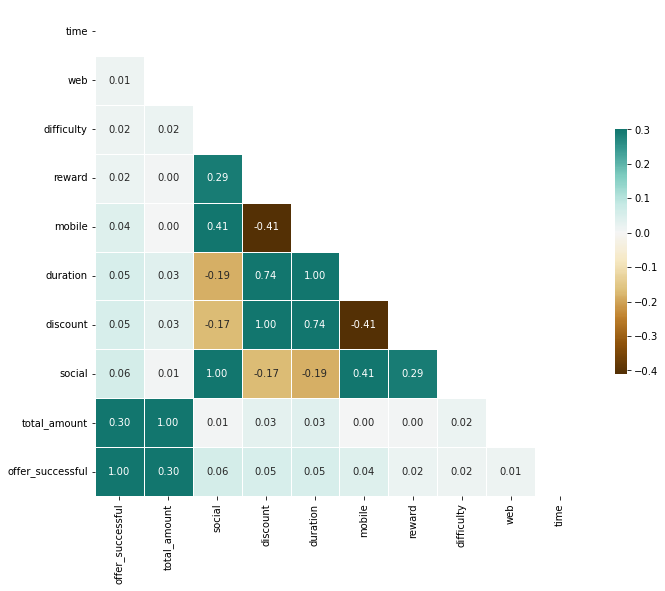

In [122]:

corr = clean_data.corr().sort_values('offer_successful', axis=1, ascending=False). \
       sort_values('offer_successful', axis=0, ascending=False).iloc[:10,:10]
corr = corr.sort_values('offer_successful', axis=0, ascending=True)
# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, center=0, cmap='BrBG', mask=mask, vmax=.3,
            square=True, linewidths=.5,  annot=True, cbar_kws={"shrink": .5},fmt=".2f");

- Total_amount, discount, social variables seems have high correlation
- Mobile and social seem to positively correlated
- Duration and social seem to correlated negatively
- Mobile and discount seem to negatively correlated

<a id='modeling'></a>
## 4. Data analysis and modeling

First of all we take a look at the dataset how many successful offer (1) and unsucessful offers (0) so as to determine the ratio relationship.

In [123]:
zero_one = clean_data.groupby(['offer_successful'])['offer_successful'].count()

In [124]:
zero_one

offer_successful
0    66567
1     1548
Name: offer_successful, dtype: int64

In [125]:
print('Print the number of unsuccessful offer are:', zero_one[0])
print('Print the number of successful offer are:', zero_one[1])

Print the number of unsuccessful offer are: 66567
Print the number of successful offer are: 1548


In [126]:
print('Print we have a ratio 0f', zero_one[0]/zero_one[1])

Print we have a ratio 0f 43.001937984496124


In [127]:
print('we have a ratio of 1 t0 approximately',round (zero_one[0]/zero_one[1]))

we have a ratio of 1 t0 approximately 43


This make our dataset hugely unbalanced. There are methods that can be used to address this problem and this is the mission that we will undertake for further analysis of the dataset.

In [128]:
clean_data.groupby("offer_successful").size()

offer_successful
0    66567
1     1548
dtype: int64

### 4.1 Pre-processing

In [129]:
# Split the data into features and target label
target = clean_data['offer_successful']


In [130]:
features = clean_data.drop(['offer_successful'], axis = 1)

In [131]:
# convert all column values names to string.
clean_data.columns = clean_data.columns.astype(str)

In [132]:
random_state = 42

In [133]:
X_train, X_test, y_train, y_test = train_test_split(features, target, stratify=target,
                                                    test_size=0.25,train_size=0.75,random_state=random_state)

In [134]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (51086, 37)
Training Labels Shape: (51086,)
Testing Features Shape: (17029, 37)
Testing Labels Shape: (17029,)


In [135]:
#from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
to_normalize = ['time','offer_id','total_amount', 'reward', 'discount','duration','difficulty','income','year_member']
features[to_normalize] = scaler.fit_transform(features[to_normalize])
features.head()

,offer_id,time,total_amount,income,year_member,18-24,25-34,35-44,45-54,55-64,...,2018,reward,difficulty,duration,email,mobile,social,web,bogo,discount
0,0.333333,0.0,0.0,0.911111,0.8,0,0,0,0,1,...,0,0.5,0.25,0.571429,1,1,0,1,1,0.0
1,0.777778,0.0,0.0,0.355556,0.2,0,0,0,1,0,...,0,0.0,0.00,0.000000,1,1,1,0,0,0.0
2,0.777778,0.0,0.0,0.400000,1.0,0,0,0,1,0,...,1,0.0,0.00,0.000000,1,1,1,0,0,0.0
3,0.444444,0.0,0.0,0.222222,1.0,0,0,0,0,1,...,1,0.5,1.00,1.000000,1,0,0,1,0,1.0
4,0.777778,0.0,0.0,0.711111,1.0,0,0,0,1,0,...,1,0.0,0.00,0.000000,1,1,1,0,0,0.0


We have an unbalance classification problem. From the data we observe the follow data structue:

Majority Class: offer unsuccessful, class 0

Minority Class: offer successful, class 1

We fit five models to determine which model best generalize on the dataset. Precisely which model have the best predictive power to informing if an offer sent to app_user will be successful or not. We are aware that the dataset is hugely unbalanced. We have a ratio of 1 to 43 approximately for the successful offers. As a result, use tool for handling unbalanced nature of the dataset.

We retrieve results using tools like the cross-validation on train dataset and conduct a bootstrap sampling of 40 samples and retrieve average performance and time score. It is done to gain knowledge on how well these models will perform.


We follow three types of approaches by using metrics for handling unbalanced dataset. These metrics are Threshold Metrics, Ranking Metrics and Probability Metrics. In addition, also try to understand how well models are learning and generalising on the validation dataset so uncover issues like over-fitting, under-fitting and where the train dataset is sufficient in modelling. These metrics would be introduced and explained later. 


## A. Threshold Metrics for Imbalanced Classification

### 1. Precision-Recall metric

#### Precision
Precision is ratio between the number of Positive samples correctly classified to the total number of samples classified as Positive (either correctly or incorrectly). It measures the model's accuracy in classifying a sample as positive (successful offers). It reflects how reliable the model is classifying offers that have been successful. 
To calculate the precision:
#### Precision = True Positives / (True Positives + False Positives)

#### Recall 
This is ratio between the number of Positive samples (successful offers) correctly classified as Positive (Success) to the total number of Positive samples. The recall measures the model's ability to detect Positive (successful offers) samples. 

To calculate recall : 
#### Recall = True Positives / (True Positives + False Negatives)

#### F1-score 
F1-score is a function of Precision and Recall. It is seeks to balance Precision and Recall and thus suitable for a uneven class distribution (eg large number of actual Negatives)

#### F1-score = 2 *((Precision *Recall)/(Precision + Recall))

#### Accuracy
Accuracy is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. It is calculated as the ratio between the number of correct predictions to the total number of predictions.

#### Accuracy = (True Positive*True Negative)/( True Positive*True Negative + False Positive + False Negative)


### Research Question 1. Which model best predicts the patterns in the dataset?

#### Model creation

- Logistic Regression
- Random Forest: ensemble bagging classifier
- K-Nearest Neighbors: instance based classifier
- Gaussian Naive Bayes: probabilistic classifier
- XGBoost: ensemble (extreme!) boosting classifier

We begin our analysis by first obtaining values of the confusion matrix. With this we use approach such as threshold metric and focus on values.

In [136]:
def run_confussion(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    script to run confussion matrix
    X_train: training split
    y_train: training target vector
    X_test: test split
    y_test: test target vector
    return: DataFrame of predictions
    '''
    dfs = [] 
    
    models = [
             # ('CATB', CatBoostClassifier(verbose=0)),
              ('LogReg', LogisticRegression(max_iter=10000)),
              ('RF', RandomForestClassifier(random_state = random_state)),
              ('KNN', KNeighborsClassifier(n_neighbors = 4)), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')) 
            ]
    
    results = []
    names = []
    models_num = len(models)
    for name, model in tqdm(models):   
            clf = model.fit(X_train, y_train)
            # predict out with text dataset
            y_pred = clf.predict(X_test)
            # retrieve confussion matrix
            cm = confusion_matrix(y_test, y_pred)
            results.append(cm)
            names.append(name)
            model_df = pd.DataFrame(cm)
            model_df['model'] = name
            dfs.append(model_df)
          
    final = pd.concat(dfs, ignore_index=False)
    return final

  

In [137]:
confussion_matrix = run_confussion(X_train, y_train, X_test, y_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:23<00:00,  4.65s/it]


In [138]:
confussion_matrix 

,0,1,model
0,16548,94,LogReg
1,334,53,LogReg
0,16499,143,RF
1,196,191,RF
0,16571,71,KNN
1,337,50,KNN
0,16465,177,GNB
1,248,139,GNB
0,16468,174,XGB
1,168,219,XGB


The data frame displays the outcome of the results on the test dataset. As we can see, we have two classes name 0 (offers that are not successful) (majority class) and 1 (offers that are successful) (minority Class). The rows represent the predicted values of the models, and the columns represents the actual true values.

The first row represents the models predicted value as unsuccessful offers, thus prediction for majority class. One will interpret it as the model has correctly predicted 16548 unsuccessful offers (True Negatives) and incorrectly predicted 94 unsuccessful offers as successful offers (False Negatives).

On the other hand, the second row of LogReg model has 1 (prediction for minority class) as index and it represents offers that the model has predicted as successful. LogReg has predicted that 334 unsuccessful offers as successful (False Positive) and 53 truly successful offers as successful (True positive).

When we compare the models, one will notice that XGB correctly predicted the highest true positive values of 219 successful. This is followed by RF model with 191 successful offers. KNN has 50 corrected predicted successful offers), GNB has 139

Because of the unbalanced dataset, our focus is to analyse minority class. 


### 4.2 Testing best models

We next present the classification report. 

### Classification results of the models

In [139]:
def run_classification(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    return models classification report of classifiers
    X_train: training split 
    y_train: training target vector
    X_test: test split
    y_test: test target vector
    return: DataFrame of predictions
    '''
    
    dfs = [] 
   
    models = [
              #('CATB', CatBoostClassifier(verbose=0)),
              ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')), 
              ('LogReg', LogisticRegression(max_iter=10000)),
              ('RF', RandomForestClassifier(random_state = random_state)),
              ('KNN', KNeighborsClassifier(n_neighbors = 4)), 
              ('GNB', GaussianNB())
            ]
    
    results = []
    names = []
    target_names = ['offer unsuccessful','offer successful' ]
    models_num = len(models)
    for name, model in tqdm(models):   
            clf = model.fit(X_train, y_train)
            # predict out with text dataset
            y_pred = clf.predict(X_test)
            print(name)
            print(classification_report(y_test, y_pred,target_names=target_names))


In [140]:
Class_final = run_classification(X_train, y_train, X_test, y_test)

 20%|████████████████▊                                                                   | 1/5 [00:02<00:08,  2.23s/it]

XGB
                    precision    recall  f1-score   support

offer unsuccessful       0.99      0.99      0.99     16642
  offer successful       0.56      0.57      0.56       387

          accuracy                           0.98     17029
         macro avg       0.77      0.78      0.78     17029
      weighted avg       0.98      0.98      0.98     17029



 40%|█████████████████████████████████▌                                                  | 2/5 [00:02<00:03,  1.19s/it]

LogReg
                    precision    recall  f1-score   support

offer unsuccessful       0.98      0.99      0.99     16642
  offer successful       0.36      0.14      0.20       387

          accuracy                           0.97     17029
         macro avg       0.67      0.57      0.59     17029
      weighted avg       0.97      0.97      0.97     17029



 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:05<00:04,  2.14s/it]

RF
                    precision    recall  f1-score   support

offer unsuccessful       0.99      0.99      0.99     16642
  offer successful       0.57      0.49      0.53       387

          accuracy                           0.98     17029
         macro avg       0.78      0.74      0.76     17029
      weighted avg       0.98      0.98      0.98     17029



100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:22<00:00,  4.54s/it]

KNN
                    precision    recall  f1-score   support

offer unsuccessful       0.98      1.00      0.99     16642
  offer successful       0.41      0.13      0.20       387

          accuracy                           0.98     17029
         macro avg       0.70      0.56      0.59     17029
      weighted avg       0.97      0.98      0.97     17029

GNB
                    precision    recall  f1-score   support

offer unsuccessful       0.99      0.99      0.99     16642
  offer successful       0.44      0.36      0.40       387

          accuracy                           0.98     17029
         macro avg       0.71      0.67      0.69     17029
      weighted avg       0.97      0.98      0.97     17029



The outcome of the classification results is presented above. The precision, recall, F1-sore and the support values are reported for the minority class (offer successful) and majority class (offer unsuccessful). Equally the support dataset upon which the predictive results are based are also presented. We have 387 datasets for minority model and 16642 for the majority class. In addition, information on the overall accuracy, macro avg and weighted avg are reported. All in all, we have a total of 17029 support values.

We are more interested in precision, recall and F1-score of minority model (successful offers) because of imbalanced dataset. From scores of models above, we observe we have relatively very high value for majority models. But due to unbalanced nature of the dataset, these results are of no use. Consider all scores of the chosen metrics. We observe that XGB has in comparison, better evaluation score (precision, recall and f1-score) (56%, 57%, 56%) accordingly. This is followed by RF model with 57%, 49% and 53%. The worst models performance comes KNN.


### Research Question 2. How are the models learning and generalizing on the train dataset? 

With this question, we try to find out the learning pattern behaviour of the various models the train dataset and test their performance on validation set. That is we want to understand how the models are learning and generalizing. Apart this we also want to find out scoring and fitting times of the models. To obtain better estimates and account for unobserved effects, we use distribution of metrics from each model and run an empirical bootstrapping at 40 samples.

Take a look at the performance cross-varidation experiment below.

In [141]:
def run_experiment(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Script to test many models and return the best models
    :X_train: training split
    :y_train: training target vector
    :X_test: test split
    :y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = [] 
    
    # Contains tuple of name and classifier or 'clf'
   
    models = [
              #('CATB', CatBoostClassifier(verbose=0)),
              ('LogReg', LogisticRegression(max_iter=10000)),
              ('RF', RandomForestClassifier(random_state = random_state)),
              ('KNN', KNeighborsClassifier(n_neighbors = 4)), 
              ('GNB', GaussianNB()),
              ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')) # Stop iteration error
            ]
    
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    models_num = len(models)
    for name, model in tqdm(models):   
            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=random_state)
            cv_results = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
            results.append(cv_results)
            names.append(name)
            model_df = pd.DataFrame(cv_results)
            model_df['model'] = name
            #con_matx = pd(con)
            dfs.append(model_df)
          
    final = pd.concat(dfs, ignore_index=True)
    
    return final
    

In [142]:
final = run_experiment(X_train, y_train, X_test, y_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:44<00:00, 20.89s/it]


We now generate our bootstrap samples and retrieve the performance and fit and scores for the various models. In addition we acess their means and standard deviations.

### Empirical bootstrapping at 40 samples?

In [143]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    # sampling of t0 with replacement
    bootstrap = model_df.sample(n=40, replace=True)
    # append to the list
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

# performance Metrics
results_long_nofit = results_long.loc[~results_long['metrics'].isin (time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

# time Metrics
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [144]:
# Create df to compare models
metrics = list(set(results_long_nofit.metrics.values))
results = bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])
results

test_f1_weighted           test_recall_weighted           test_roc_auc  \
                    std      mean                  std      mean          std   
model                                                                           
GNB            0.001953  0.974767             0.001295  0.976207     0.006439   
KNN            0.001945  0.969725             0.001109  0.976660     0.013357   
LogReg         0.001650  0.972244             0.001031  0.977239     0.002325   
RF             0.001260  0.977942             0.000965  0.979730     0.005052   
XGB            0.000556  0.979746             0.000755  0.980085     0.001252   

                 test_accuracy           test_precision_weighted            
            mean           std      mean                     std      mean  
model                                                                       
GNB     0.960263      0.001295  0.976207                0.002507  0.973789  
KNN     0.836438      0.001109  0.976660                0.002217  0.967373  
LogReg  0.980950      0.001031  0.977239                0.001800  0.970272  
RF      0.978981      0.000965  0.979730                0.001358  0.976934  
XGB     0.987646      0.000755  0.980085                0.000637  0.979492

As we can see above XGB appear to have the best predictive power amongst the various model.

In [145]:
# Mean score of each model
max_scores = results_long_nofit.groupby('model').max().reset_index()
max_scores['metrics'] = 'test_overall_score'
max_scores = max_scores[['model', 'metrics', 'values']]
max_scores

,model,metrics,values
0,GNB,test_overall_score,0.977880
1,KNN,test_overall_score,0.977684
2,LogReg,test_overall_score,0.982560
3,RF,test_overall_score,0.984746
4,XGB,test_overall_score,0.989680


The overall XGB model seems have the best model

When we consider the overall test score the XGB classifier has best generalisation power. This is followed by RF, LogReg, KNN and GNB.

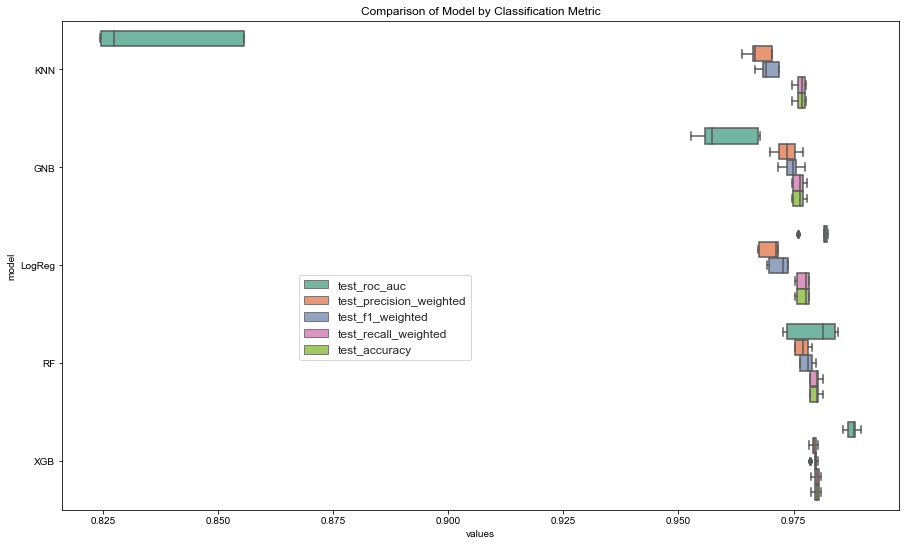

In [146]:
#  plot boxplot for scores of the models
plt.figure(figsize=(15, 9))
ax = sns.boxplot(x="values", y="model", hue="metrics", data=results_long_nofit, palette="Set2").set(title='Comparison of Model by Classification Metric') 
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.2, style='whitegrid')
plt.legend(bbox_to_anchor=(0.5, 0.5), loc=1, borderaxespad=.8, fontsize=12)
plt.show()

The graph shows boxplot of the score grids of the various models. At the first glance we observe that the best models that generalize the validation dataset for almost all scores are the RF and XGB models. This confirms our observation from the above analysis.

### Research Question 4: Which models is the cheapest in terms of score and fit times?

In [147]:
# Labels
time_metrics = list(set(results_long_fit.metrics.values))

# group results
std_mean = bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean]).reset_index()


In [148]:
std_mean

model  fit_time           score_time           
                std      mean        std       mean
0     GNB  0.002333  0.038461   0.001746   0.030210
1     KNN  0.001497  0.017503   0.498680  16.058454
2  LogReg  0.079508  0.351757   0.004104   0.024409
3      RF  0.064531  2.299581   0.019747   0.268280
4     XGB  0.039495  1.737854   0.004429   0.061033

KNN has the worst score_time. XGB has better score than RF.

### Reseach Question 5: What pattern do models' learning characteristics on the training dataset and generalizing characteristics on validation  dataset take?

From the above analysis using the bootstrap sampling, we observe that XGB appears to best predictive estimator. To retrieve information on the learning dynamics of the models, we will use train and validation learning curves by monitoring the training and validation scores (model accuracy) with increasing number of training samples.

In [149]:
def train_validate_graph(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    models = [
              #('CATB', CatBoostClassifier(verbose=0)),
              ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')), 
              ('RF', RandomForestClassifier(random_state = random_state)),
              ('KNN', KNeighborsClassifier(n_neighbors = 5)), 
              ('GNB', GaussianNB()),
              ('LogReg', LogisticRegression(max_iter=10000)) # Stop iteration error
              ]
    models_list = len(models)
   
    for name, model in tqdm(models): 
        #cnter+=1 
        #bar.update(cnter)
        #pipeline = make_pipeline(model)
        train_sizes, train_scores, test_scores = learning_curve(model, 
                                                        X_train, y_train, 
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
   
        # Create means and standard deviations of training set scores                                                     
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
    
        # Create means and standard deviations of test set scores
        test_mean = np.mean(test_scores, axis=1)
        test_std = np.std(test_scores, axis=1)
        #axes = plt.subplots(1, 3, figsize=(20, 5))
        # Plot the learning curve
        plt.plot(train_sizes, train_mean, color='#735c12', marker='o', markersize=5, label='Training Accuracy')
        plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='#06c2ac')
    
        # Draw bands
        plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
        plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    
        # Create plot
        plt.title(f'{name}, Learning Curve')
        plt.xlabel('Training Data Size')
        plt.ylabel('Model accuracy')
        plt.grid()
        plt.legend(loc='lower right')
        #bar.finish()
        plt.show()
      

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

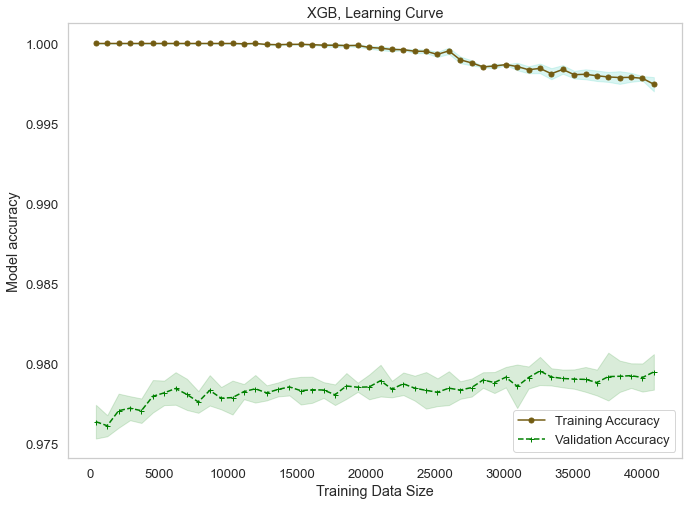

 20%|████████████████▌                                                                  | 1/5 [03:06<12:24, 186.07s/it]

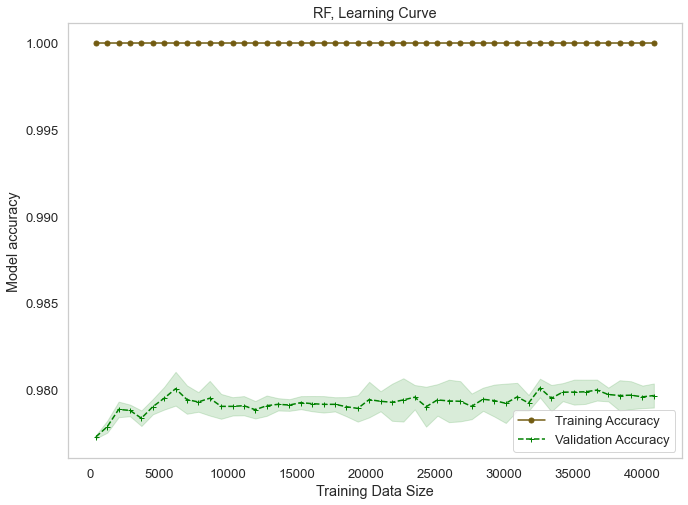

 40%|█████████████████████████████████▏                                                 | 2/5 [04:36<06:29, 129.93s/it]

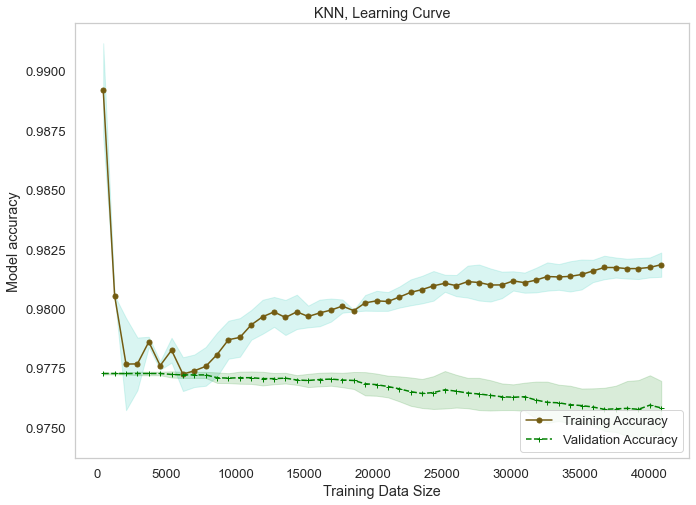

 60%|█████████████████████████████████████████████████▊                                 | 3/5 [25:59<21:52, 656.32s/it]

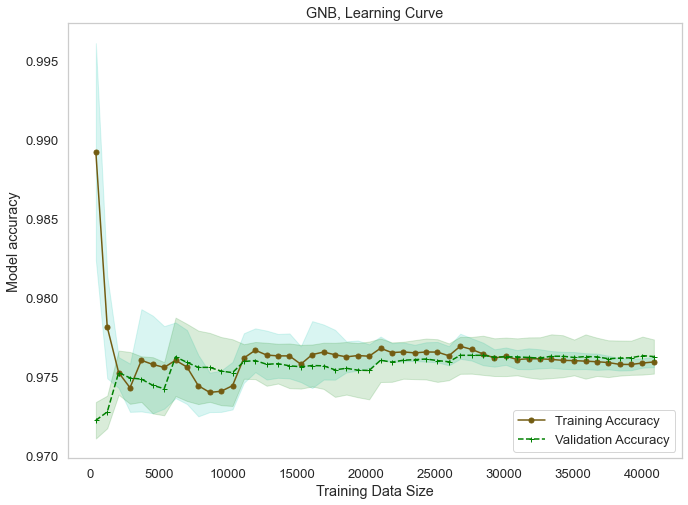

 80%|██████████████████████████████████████████████████████████████████▍                | 4/5 [26:05<06:39, 399.75s/it]

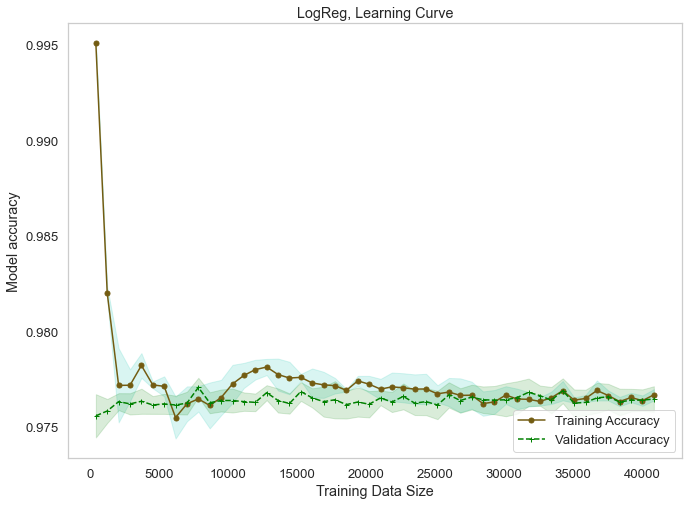

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [26:27<00:00, 317.44s/it]


In [150]:
bias_variance_trade_off = train_validate_graph (X_train, y_train, X_test, y_test)
bias_variance_trade_off

#### XGB
The training accuracy appears to be falling, while the validation accuracy turns to be increasing with increasing sample size. There is the tendency some room for improvm that learning curve meets validation curve with increasing sample size. With increasing sample size overfitting will be minimize.
#### RF
The model learning accuracy remains high and constant. The validation sore is high The validation accuracy appears to be rising slightly. More samples might be needed to overcome over-fitting. 
#### KNN
The learning curve starts low and increased with increasing sample size, while die validation curve is also increasing. The model has the tendency to improve over over-fitting with increasing sample size.
#### GBN
Both learning and validation accuracy sharply increase initially and after sample size of 10000 remain constant with increasing sample size. There is a tendency to reduce over-fitting. 
#### LogReg
Both training and validation accuracy curve have an increasing accuracy, and both meet at a sample size of 30000 and, hence reducing over-fitting. 


## B. Ranking Metrics for Imbalanced Classification

### Research Question 6: Which models has the highest probability of predicting whether an offer sent to a customer will be successful?

## Precision-Recall curve

From the above analysis XGB models has the best predictive power with regards to successful offers. We may explore hyperparameters like the number of trees, learning rate, tree depth, etc. to improve the model.
To evaluate performance of the models, we perform binary classification by using precision-recall curve as a tool. Here the focus is on the performance of the classifier on the minority class because of the unbalanced nature of the dataset. We want to measure the performance of the classifiers by using metric known as AUC-PR. AUC-PR stands for area under the (precision-recall) curve and can be expressed in percentages.

As we may remember, Precision, Recall and f1-score values are calculated form true positive (offer correctly predicted as successful by the model), false positive (offer unsuccessful but predicted as successful ), true negative (offer unsuccessful and correctly predicted as successful by the model) and false negative (offer successful but incorrectly predicted as successful by the classifier)

We plot the precision (y-axis) and the recall (x-axis) for different thresholds. The blue dotted line represents a “Non skill” classifier — this classifier would simply predict that all instances (offer sent) will be to successful (belonging to a positive class). It changes bases on the distribution of the positive (successful) to negative (unsuccessful) classes.



In [151]:
def estimate_presion_recall(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    ns_probs = [0 for _ in range(len(y_test))]
# fit a model
    models = [
              #('CATB', CatBoostClassifier(verbose=0)),
              ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')), 
              ('RF', RandomForestClassifier(random_state = random_state)),
              ('KNN', KNeighborsClassifier(n_neighbors = 5)), 
              ('GNB', GaussianNB()),
              ('LogReg', LogisticRegression(max_iter=10000)) # Stop iteration error
              ]
    models_list = len(models)
   
    for name, model in tqdm(models): 
        model.fit(X_train, y_train)
        # predict probabilities
        model2_probs = model.predict_proba(X_test)
        # keep probabilities for the positive outcome only
        model2_probs = model2_probs[:, 1]
        y_pred = model.predict(X_test)
        model2_precision, model2_recall, _ = precision_recall_curve(y_test, model2_probs)
        model2_f1, model2_auc = f1_score(y_test, y_pred), auc(model2_recall, model2_precision)
        # summarize scores
        print('{}, f1 = {}, auc = {}'.format(name, round(model2_f1,3), round(model2_auc,3)))
        # plot the precision-recall curves
        no_skill = len(y_test[y_test==1]) / len(y_test)
        plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
        plt.plot(model2_recall, model2_precision, marker='.', label=name,color='green')
        # axis labels
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        # show the legend
        plt.legend()
       # show the plot
        plt.show()

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

XGB, f1 = 0.562, auc = 0.551


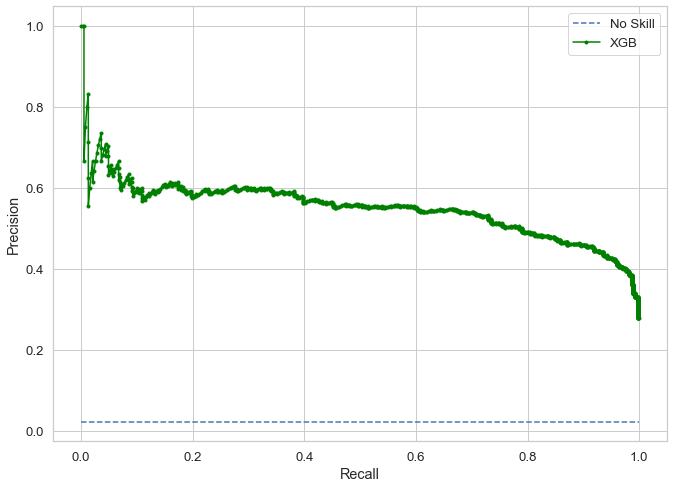

 20%|████████████████▊                                                                   | 1/5 [00:02<00:11,  2.76s/it]

RF, f1 = 0.53, auc = 0.589


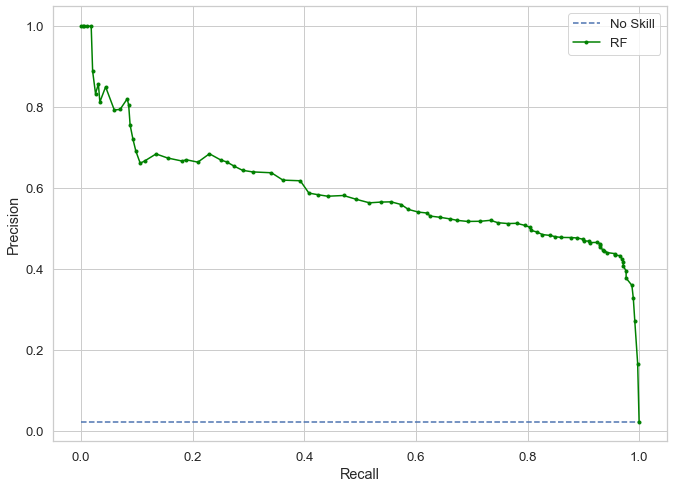

 40%|█████████████████████████████████▌                                                  | 2/5 [00:06<00:09,  3.08s/it]

KNN, f1 = 0.253, auc = 0.372


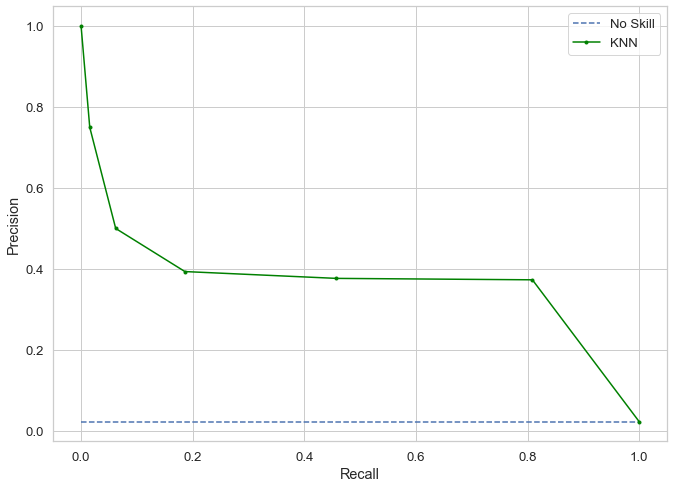

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:39<00:34, 17.05s/it]

GNB, f1 = 0.395, auc = 0.418


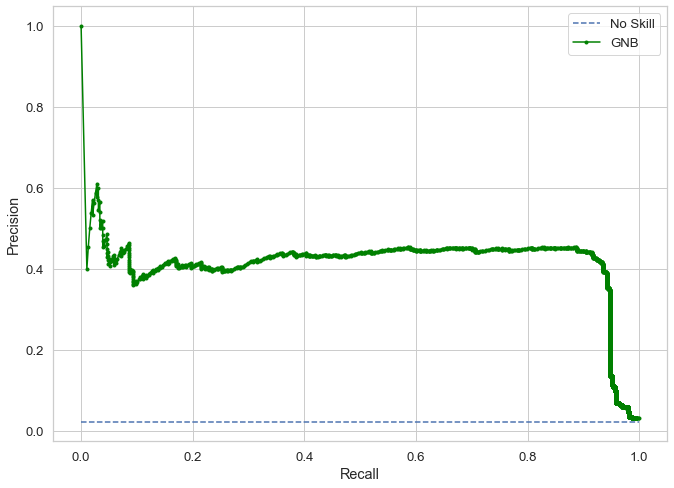

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:39<00:10, 10.42s/it]

LogReg, f1 = 0.199, auc = 0.382


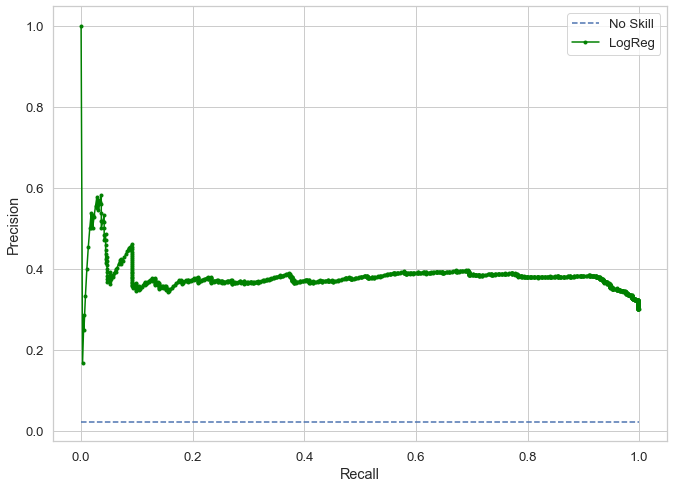

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:40<00:00,  8.10s/it]


In [152]:
est_pre_recall = estimate_presion_recall(X_train, y_train, X_test, y_test)
est_pre_recall

RF has highest predictive power of 58.9% when we consider the area under the curve. XGB model follows with 55.1% However, it has a higher fl-sore value than RF. KNN has 58,7%. KNN has the worst predicting score.

We select based on our analysis sofar XGB model. We may explore hyperparameters like the number of trees, learning rate, tree depth, etc. to improve the model. 

## C. Probabilistic Metrics for Imbalanced Classification

### Research Question 7: How well does the model account for under-fitting, over-fitting and unrepresentation of the Train Dataset?

We have seen that XGB model is the best performing model. We will determine how it guides against under-fitting, over-fitting, and unrepresentative Train Dataset.

In [153]:
model= XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

CPU times: total: 18.7 s
Wall time: 2.52 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [154]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.99%


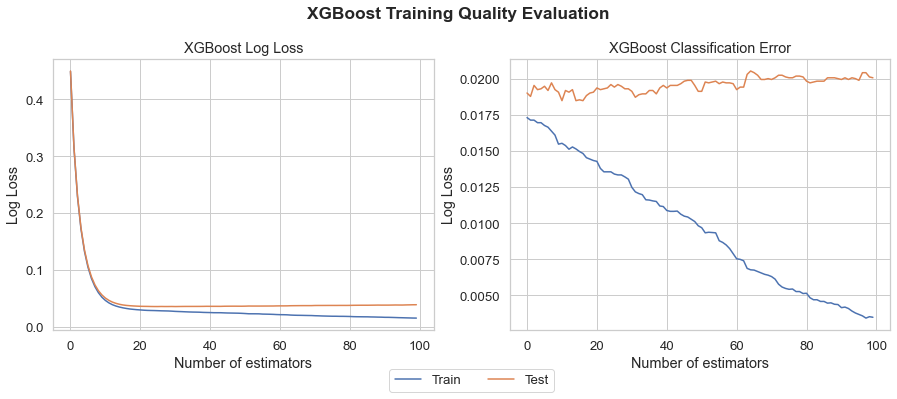

In [155]:
# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

f, axes = plt.subplots(1, 2, figsize=(15, 5))
f.suptitle('XGBoost Training Quality Evaluation\n\n', fontweight ="bold",y=1.025)
ax1, ax2 = axes[0], axes[1]
# Plot log loss
ax1 = sns.lineplot(x=x_axis, y=results['validation_0']['logloss'], label='Train', ax=ax1)
ax1 = sns.lineplot(x=x_axis, y=results['validation_1']['logloss'], label='Test', ax=ax1)
ax1.legend().remove()
ax1.set(xlabel='Number of estimators',
       ylabel='Log Loss',
       title='XGBoost Log Loss')

#pyplot.show()
ax2 = sns.lineplot(x=x_axis, y=results['validation_0']['error'], label='Train', ax=ax2)
ax2 = sns.lineplot(x=x_axis, y=results['validation_1']['error'], label='Test', ax=ax2)
ax2.legend(bbox_to_anchor=(-0.1, -.25), loc=8, ncol=3)
#Plot classification error
ax2.set(xlabel='Number of estimators',
       ylabel='Log Loss',
       title='XGBoost Classification Error');


The graph above shows log loss for train and test dataset. They both begin to fall shapely initially and there is no gap between them. However, after a while a gap appears between them. The classification error for the test data appears to be increasing while that of the train set continues to fall. 

To improve the performance of the model, we use GridSearchCV optimisation method to search for hyperparameters to determine if there will be an increase in the performance of the model.

The GridSearchCV works by accepting possible values for the provided hyperparameters and fits separate models on the given data for each combination of hyperparameters. The performance of each combination of hyperparameters is then evaluated and the best performing model is selected.



## Hyperparameter Search 

In [156]:
  params = { 'max_depth':[5, 6],
              'learning_rate':[0.01, 0.05],
              'n_estimators':[220, 300],
              'colsample_bytree':[0.6, 1],
              'reg_alpha':[0.01,0.02], 
              'gamma':[0.01, 0.5],
              'scale_pos_weight':[2, 2.5]
              }
    
model= XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
clf = GridSearchCV(estimator = model, param_grid=params,scoring='accuracy', verbose=1,cv=5)
    
clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best parameters: {'colsample_bytree': 0.6, 'gamma': 0.01, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'reg_alpha': 0.02, 'scale_pos_weight': 2}


We can now insert used the best model from the GridSearch and retrain the model again to see how the model performs.

In [157]:
def run_bconfuss(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Script to test many models and return the best models
    :X_train: training split
    :y_train: training target vector
    :X_test: test split
    :y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = [] 
    
    # Contains tuple of name and classifier or 'clf'
   
    models = [
              
              ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                                    colsample_bytree= 0.6, learning_rate= 0.01, max_depth= 5,
                                    colsample_bylevel= 1,random_state=42,
                                    n_estimators=300, reg_alpha=0.02,n_jobs=-1,
                                    gamma=0.01,scale_pos_weight=2))
            ]

    results = []
    names = []
    
    models_num = len(models)
    for name, model in tqdm(models):   
            clf = model.fit(X_train, y_train)
            # predict out with text dataset
            y_pred = clf.predict(X_test)
            cm = confusion_matrix(y_test, y_pred)
            results.append(cm)
            names.append(name)
            model_df = pd.DataFrame(cm)
            model_df['model'] = name
            #con_matx = pd(con)
            dfs.append(model_df)
          
    final = pd.concat(dfs, ignore_index=False)
    return final
    

In [158]:
cfinal = run_bconfuss(X_train, y_train, X_test, y_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.08s/it]


In [159]:
cfinal 

,0,1,model
0,16427,215,XGB
1,105,282,XGB


In the above graph we have selected parameters. We set our model with the newly acquired parameters, train and test on model once again. Below are results of the confusion and classification report. The true positive values for the minority class now stand at 282 and the false positive values are 105. This is an improvement against initial results. There, they stand at 218 and 198 for true positive and false positive values accordingly. 

In [160]:
def run_bcross(X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Script to test many models and return the best models
    :X_train: training split
    :y_train: training target vector
    :X_test: test split
    :y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = [] 
    
    # Contains tuple of name and classifier or 'clf'
   
    models = [
              #('CATB', CatBoostClassifier(verbose=0)),
              ('XGB', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                                    colsample_bytree= 0.6, learning_rate= 0.01, max_depth= 5,
                                    colsample_bylevel= 1,random_state=42,
                                    n_estimators=300, reg_alpha=0.02,n_jobs=-1,
                                    gamma=0.01,scale_pos_weight=2))
    ]
    
    results = []
    names = []
    target_names = ['offer unsuccessful','offer successful' ]
    models_num = len(models)
    for name, model in tqdm(models):   
            clf = model.fit(X_train, y_train)
            # predict out with text dataset
            y_pred = clf.predict(X_test)
            print(name)
            print(classification_report(y_test, y_pred,target_names=target_names))
    

In [161]:
bfinal = run_bcross(X_train, y_train, X_test, y_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.14s/it]

XGB
                    precision    recall  f1-score   support

offer unsuccessful       0.99      0.99      0.99     16642
  offer successful       0.57      0.73      0.64       387

          accuracy                           0.98     17029
         macro avg       0.78      0.86      0.81     17029
      weighted avg       0.98      0.98      0.98     17029



The classification reports for the precision, recall and f1-score are 57%, 73% and 64% according. Originally, they are 56%, 57% and 57%. The false negatives for our minority class has reduced to much of our excitement because the recall has a score of 73%.

Let us now retrieve the log los and classification error

In [162]:
model= XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                                    colsample_bytree= 0.6, learning_rate= 0.01, max_depth= 5,
                                    colsample_bylevel= 1,random_state=42,
                                    n_estimators=300, reg_alpha=0.02,n_jobs=-1,
                                    gamma=0.01,scale_pos_weight=2)

In [163]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["logloss","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=False)

CPU times: total: 38.2 s
Wall time: 5.13 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.01,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0.02, reg_lambda=1,
              scale_pos_weight=2, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [164]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.12%


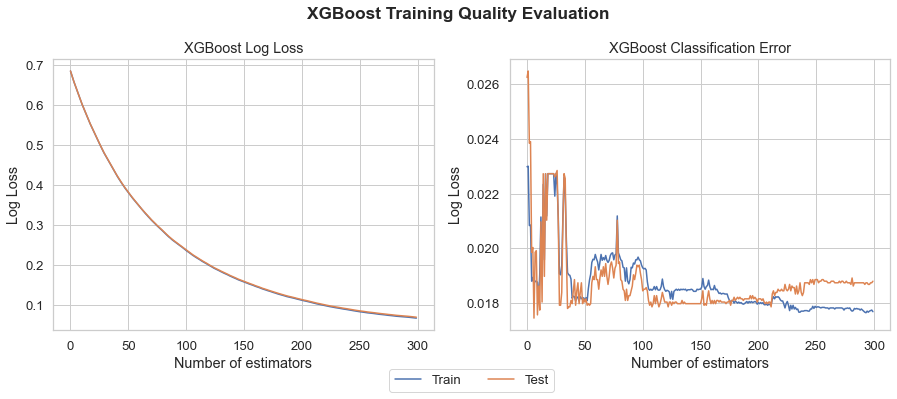

In [165]:
# Retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

f, axes = plt.subplots(1, 2, figsize=(15, 5))
f.suptitle('XGBoost Training Quality Evaluation\n\n', fontweight ="bold",y=1.025)
ax1, ax2 = axes[0], axes[1]
# Plot log loss
ax1 = sns.lineplot(x=x_axis, y=results['validation_0']['logloss'], label='Train', ax=ax1)
ax1 = sns.lineplot(x=x_axis, y=results['validation_1']['logloss'], label='Test', ax=ax1)
ax1.legend().remove()
ax1.set(xlabel='Number of estimators',
       ylabel='Log Loss',
       title='XGBoost Log Loss')

#pyplot.show()
ax2 = sns.lineplot(x=x_axis, y=results['validation_0']['error'], label='Train', ax=ax2)
ax2 = sns.lineplot(x=x_axis, y=results['validation_1']['error'], label='Test', ax=ax2)
ax2.legend(bbox_to_anchor=(-0.1, -.25), loc=8, ncol=3)
#Plot classification error
ax2.set(xlabel='Number of estimators',
       ylabel='Log Loss',
       title='XGBoost Classification Error');


After fitting tuning the model with the GridSearch parameters, we observe that the LogLoss and classification error have reduced as well and this is a confirmation of the optimisation of results of the minority class. Below the graph shows log loss of the train and test set follow the same path. This can be seen in the classfication error.

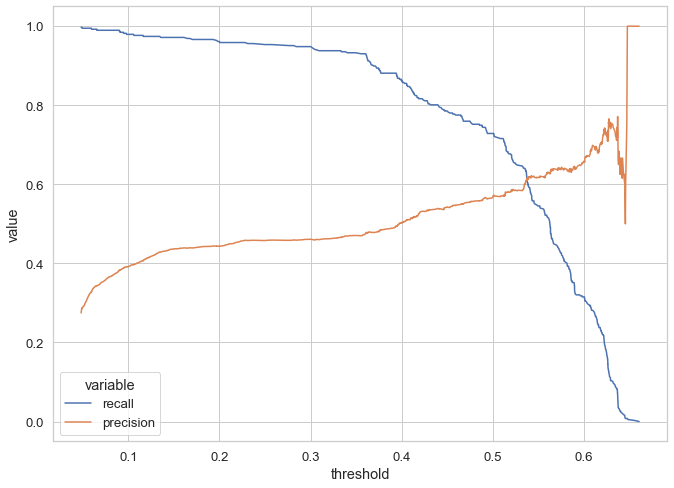

In [166]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, y_pred_proba)
tst_prt = pd.DataFrame({
    "threshold": threshold,
    "recall": recall[1:],
    "precision": precision[1:]
})
tst_prt_melted = pd.melt(tst_prt, id_vars = ["threshold"],value_vars = ["recall", "precision"])
sns.lineplot(data = tst_prt_melted, x = "threshold", y = "value",hue = "variable");

The graph shows threshold between precision and recall values. Obviously if we want to increase recall, we will need to compromise on precision and the other way around. That is, we will have to reduce threshold to incease recall. We see that both curves meet at a threshold of 0.55 and 0.6 value.

<a id='evaluation'></a>
## 5. Variable importance evaluation

### Research Question 8:Which features should decision makers pay attention to?

First all we fit, train and test our model by the optimal hyperparameters. 

In [167]:
model= XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                                    colsample_bytree= 0.6, learning_rate= 0.01, max_depth= 5,
                                    colsample_bylevel= 1,random_state=42,
                                    n_estimators=300, reg_alpha=0.02,n_jobs=-1,
                                    gamma=0.01,scale_pos_weight=2)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eval_metric='mlogloss', gamma=0.01,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0.02, reg_lambda=1,
              scale_pos_weight=2, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [168]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 98.12%


Below we have the relative importance of the features use for the model prediction.

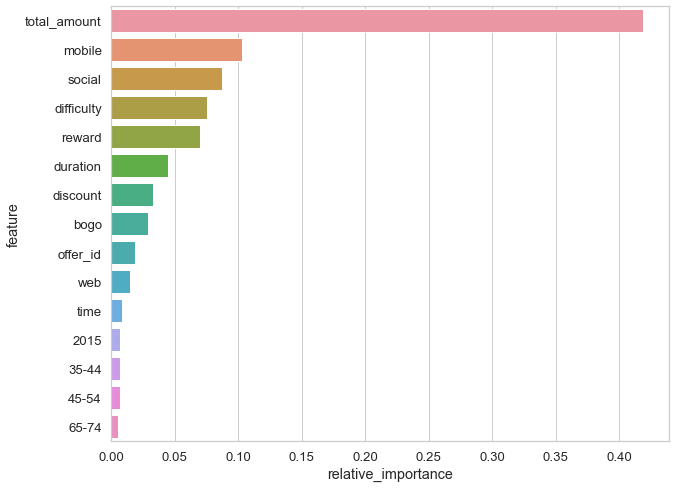

In [169]:
relative_importance = model.feature_importances_
relative_importance = relative_importance / np.sum(relative_importance)

feature_importance =\
    pd.DataFrame(list(zip(features,
                          relative_importance)),
                 columns=['feature', 'relative_importance'])

feature_importance = feature_importance.sort_values('relative_importance',
                                                    ascending=False)

feature_importance = feature_importance.reset_index(drop=True)

plt.figure(figsize=(10, 8))
sns.barplot(x='relative_importance',
            y='feature',
            data=feature_importance[:15]);

The graph present the relative importance of the 15 most important variables. Features like total_amount, mobile, social, difficulty, etc have contributed to the buliding of the model generally. This is a combination of the two classes (Minority and Majority class)

### Variable importance with Shap

To access how much each factor in a model has contributed to the prediction  we use SHAP values. SHAP values are used to explain the predictions of a model. First we create the model, then we pass our model into the SHAP Explainer function to create an explainer object and then use this to calculate the SHAP values for each observation.

In [170]:
# pass model to shap explainer
explainer = shap.Explainer(model, X_train, feature_names = np.array(features))
# create shap values
shap_values = explainer(X_test)

100%|===================| 16944/17029 [01:15<00:00]        

### beeswarm plot

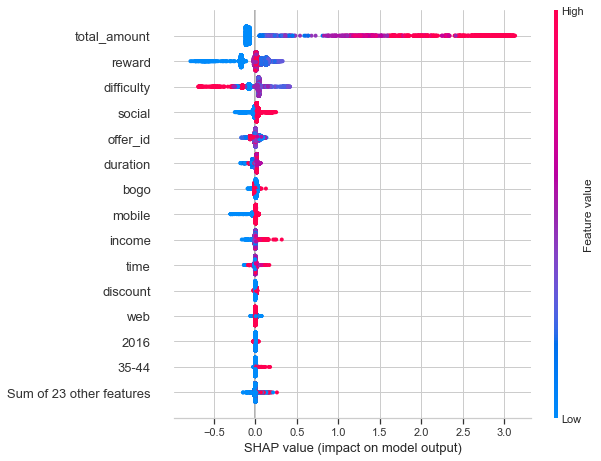

In [171]:
shap.plots.beeswarm(shap_values, max_display=15, show=False)
plt.gcf().axes[-1].set_aspect(100)
plt.gcf().axes[-1].set_box_aspect(100)

The beeswarm plot highlight important relationships of the features for model construction. The values are grouped by the features on the y-axis. For each group, the colour of the points is determined by the value of the same feature. Redder feature values are indication of the feature contributes positively to our model construction (minority class). Bluer values is an indication of the feature contributing negatively towards our minority class. 

For example, higher values of total amount indicates that offer sent to user is successful. No value is an indication that offer sent to potential user is not successful. Consider feature Total_amout, the redder part indicates larger values contributes positively to minority class (offer successful). When reward decreases, offer sent to app users will likely not be successful. If the difficulty level is reduced, offers sent to app users will likely be successful. The pattern of effects  on offer success can be analysed for each feature. 


100%|===================| 16971/17029 [01:17<00:00]        

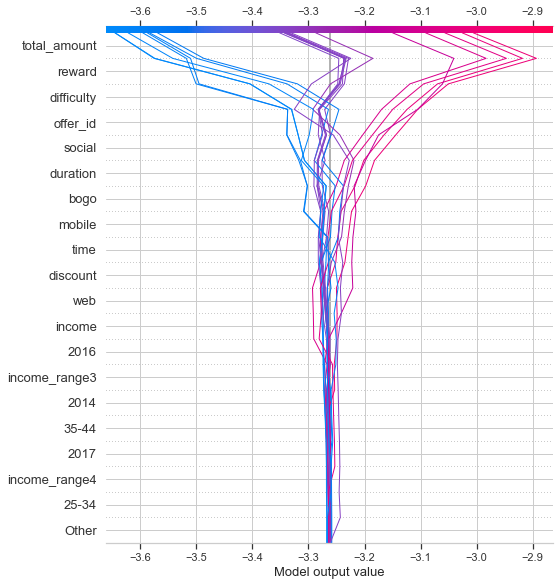

In [172]:
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 10 observations
shap.decision_plot(expected_value, shap_array[0:20],feature_names=list(X_test.columns))

They all start at the same base value of 3.26 and end at their final predicted number of rings. As you move up from each feature on the y-axis, the movement on the x-axis is given by the SHAP value for that feature. We can already see some trends. For example, some of the lines seem to zig-zag at the top of the chart. 


### 1. Features importance on the minority class (Offer successful)

### Force plot

In [173]:
shap.initjs()
ind = np.argmax(y_test == 1)
print("actual is:", y_test.values[ind], "while pred is:", y_pred[ind])
shap.plots.force(shap_values[ind])


actual is: 1 while pred is: 1


From the above force plot we see how the variables contributed to the model construction.We can see the collision between the features pushing left and right until we have the output. 

Next plot the waterfall. It's plots are designed to display explanations for individual predictions, so they expect a single row of an Explanation object as input.

### Waterfall plot

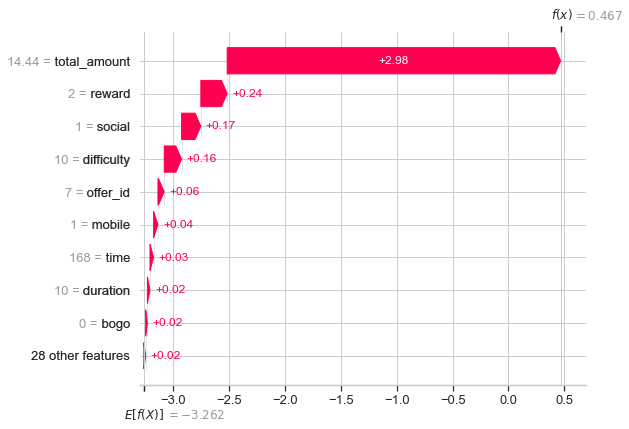

In [175]:
shap.plots.waterfall(shap_values[ind])

The bottom of the E(f(x)= -3.262 starts as the expected value of the model output, and then each row shows how positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction f(x) = 0.467. The units on the x-axis are log-odds units, so negative values imply probabilies of less than 0.5 that the offer sent to users would be successful.

There are 26 other factors that are impactful features have been collapsed into a single term. We can see the collision between the features pushing left and right until we have the output. The numbers on the left side is the actual observations in the data. While the numbers inside the graph are the shap values for each feature.



Since waterfall plots only show a single sample worth of data, we can't see the impact of changing features. To see this, we can use a scatter plot, which shows how the values impact the successful of offers. (minority model)

### 2. Features importance on the majority class (unsuccessful)

In [176]:
## we init JS once in our session
shap.initjs()
ind = np.argmax(y_test == 0)
print("actual is (offer unsuccessful):", y_test.values[ind], "while pred is (unsuccessful):", y_pred[ind])
shap.plots.force(shap_values[ind])
# actual is: 0.0 while pred is: 0.0

actual is (offer unsuccessful): 0 while pred is (unsuccessful): 0


We see that for the majority class features like total_amount =0, 2016=1, income=5.8e+4 and time=567 contribute negatively to building minority class. Feature values such as discount=1, duration=7, bogo=0, offer_id =6, diffculty =7 and reward=3 contribute positively towards building the minority model. Starting at a base value -3.262 they push the value of the model to -3.12. At boundary we have features reward=3 and total_amount =0. The impact of variables pushing from the right (in blue) is stronger than those pushing from the left(in red) and thus favours the majority class over minority class.

### Scatter plot

Since waterfall plots only show a single sample worth of data, we can't see the impact of changing features. To see this, we use a scatter plot, which shows how the feature values impact the successful of offers. (minority class)

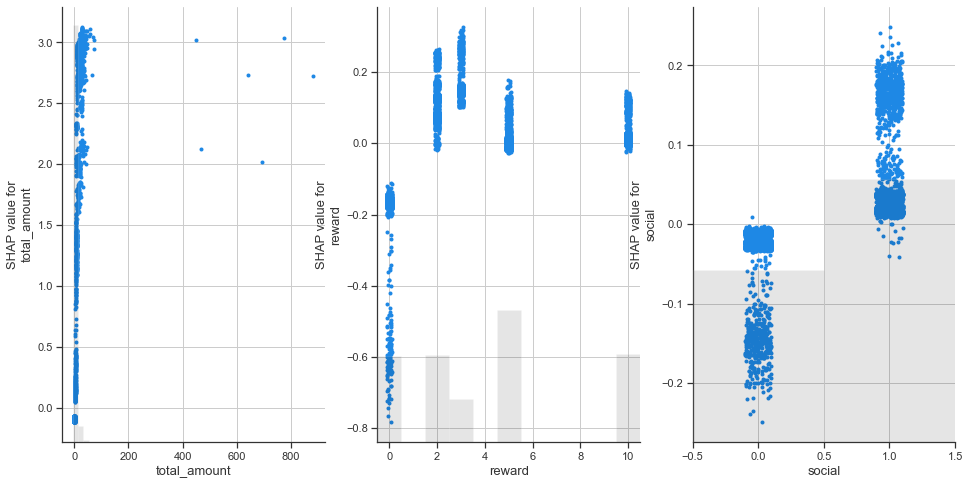

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,8))

shap.plots.scatter(shap_values[:,"total_amount"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"reward"],ax=ax[1],show=False)
shap.plots.scatter(shap_values[:,"social"],ax=ax[2],show=False)


From the plot, we see that positive values of  total_amout contributes towards an offer being successful. With feature reward, no reward will most likely lead to an offer being unsuccessful and reward have positive impact on offer being successful.

### Scatter plot

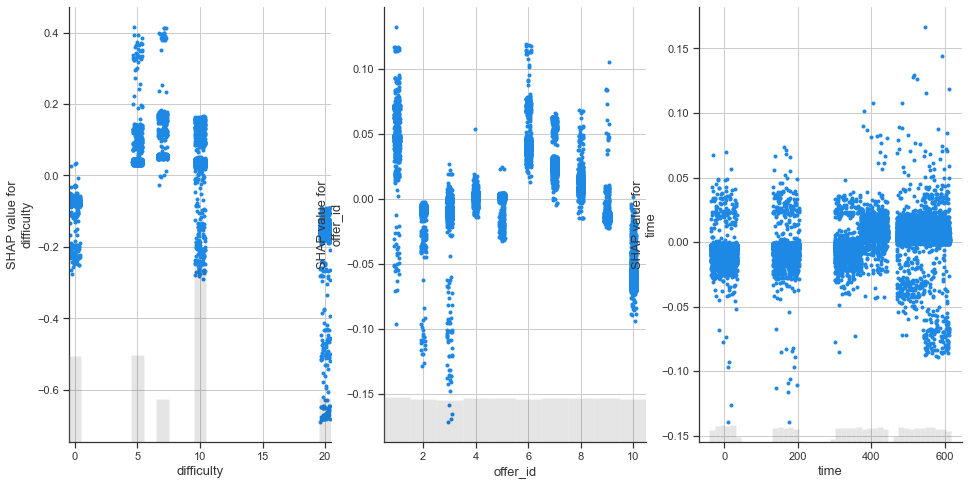

In [178]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,8))

shap.plots.scatter(shap_values[:,"difficulty"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"offer_id"],ax=ax[1],show=False)
shap.plots.scatter(shap_values[:,"time"],ax=ax[2],show=False)


There should be certain degree of difficulty. However, difficulty level of 15 certainly has negative impact on success of offers. Some offer_id have positive and other negative impact. Decision makers should consider droping offer_ids 2, 3, 4 and 10. The time feature values have mixed impact.

### Scatter plot

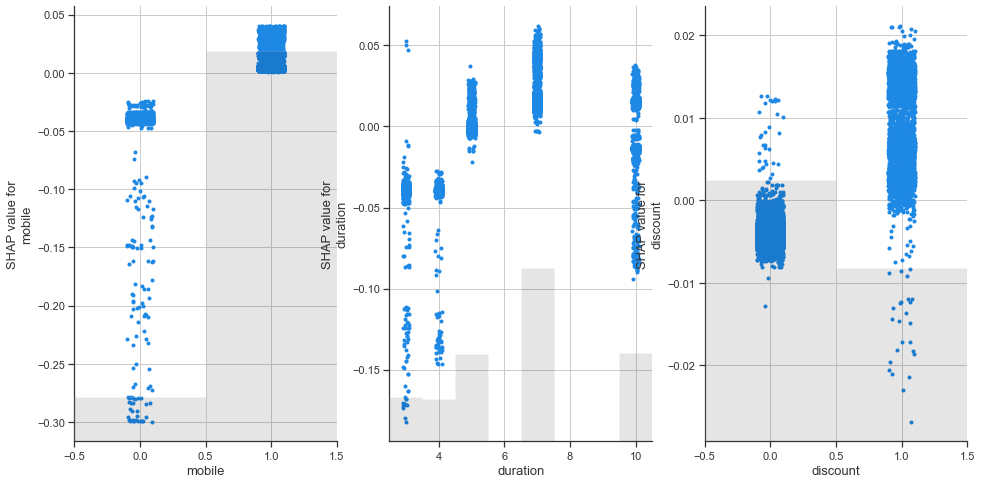

In [179]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(16,8))

shap.plots.scatter(shap_values[:,"mobile"],ax=ax[0],show=False)
shap.plots.scatter(shap_values[:,"duration"],ax=ax[1],show=False)
shap.plots.scatter(shap_values[:,"discount"],ax=ax[2],show=False)


Mobile certainly have postive influence. Some duration values like 2, 4 have negative impact and discount favours offer being becomming successful.

<a id='reference'></a>
## Reference

https://github.com/Surveshchauhan/StarbucksKNowledge/blob/main/Starbucks_Capstone_notebook.ipynb

https://shaplrjball.readthedocs.io/en/latest/example_notebooks/general/Explainable%20AI%20with%20Shapley%20Values.html

https://stackoverflow.com/questions/14507794/pandas-how-to-flatten-a-hierarchical-index-in-columns

https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost

https://stackoverflow.com/questions/48434960/getting-precision-and-recall-using-sklearn

https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

https://www.kaggle.com/code/dansbecker/permutation-importance/tutorial

https://www.statology.org/pandas-rename-columns/

https://stackoverflow.com/questions/62531881/why-does-the-permutation-importance-box-plot-look-strange-how-to-plot-a-horizon

https://stackoverflow.com/questions/66090750/how-to-show-feature-values-in-shap-waterfall-plot

https://coderzcolumn.com/tutorials/machine-learning/shap-explain-machine-learning-model-predictions-using-game-theoretic-approach

https://minimatech.org/explain-python-machine-learning-models-with-shap-library/

https://www.statology.org/pandas-change-index-values/

https://sharkcoder.com/data-visualization/mpl-barh-chart

https://evgenypogorelov.com/multiclass-xgb-shap.html

https://stackoverflow.com/questions/65534163/get-a-feature-importance-from-shap-values

https://realpython.com/python-range/

https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/

https://mljar.com/blog/feature-importance-xgboost/

https://stackoverflow.com/questions/48079973/xgboost-sample-weights-vs-scale-pos-weight

https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/

https://www.linkedin.com/pulse/machine-learning-model-performance-error-analysis-payam-mokhtarian/

https://stackoverflow.com/questions/70294681/colormap-bar-on-shap-summary-plot-not-displaying-properly

https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost

https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost

https://stackoverflow.com/questions/68233466/shap-exception-additivity-check-failed-in-treeexplainer

https://dataaspirant.com/handle-imbalanced-data-machine-learning/

https://datascience.stackexchange.com/questions/30881/when-is-precision-more-important-over-recall#:~:text=Recall%20is%20more%20important%20than%20precision%20when%20the,of%20passing%20up%20on%20a%20candidate%20is%20high.
